In [1]:
cd("..") # set correct working directory 
cd("..") 
pwd() # the path should go to the folder with the .git file 

"/home/samuel/Documents/projects/cpmmh for sdemems/code"

In [62]:
using Pkg
using Pkg
using PyCall 
PyDict(pyimport("matplotlib")["rcParams"])["ps.useafm"] = [true]
PyDict(pyimport("matplotlib")["rcParams"])["pdf.use14corefonts"] = [true]
PyDict(pyimport("matplotlib")["rcParams"])["text.usetex"] = [true]
using PyPlot 
using LinearAlgebra
using DataFrames
using KernelDensity  
using LaTeXStrings
using Distributions

save_plots = true 
save_data = false 
run_algorithms = true 

# load functions
include(pwd()*"/src/SDEMEM OU process/ou_sdemem.jl")
include(pwd()*"/src/SDEMEM OU process/mcmc.jl")

#M_subjects = parse(Int,ARGS[1])
#N_time = parse(Int,ARGS[2])

N_time = 200
M_subjects = 40
seed = 100
y,x,t_vec,dt,η,σ_ϵ,ϕ,prior_parameters_η,prior_parameters_σ_ϵ = set_up(M=M_subjects,N=N_time, seed = seed)


┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at In[62]:4
└ @ Core In[62]:4
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at In[62]:5
└ @ Core In[62]:5
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at In[62]:6
└ @ Core In[62]:6


([-0.197441 0.0445868 … 10.8305 11.4634; -0.408943 0.0123882 … 15.0314 15.1339; … ; -0.1433 0.472403 … 8.17592 7.75262; 0.492375 0.637416 … 10.1097 10.0065], [0.0 0.225013 … 11.173 11.1535; 0.0 0.0400755 … 14.9598 15.2664; … ; 0.0 0.00388002 … 8.07271 8.06666; 0.0 0.182204 … 10.3196 10.4451], [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45  …  9.5, 9.55, 9.6, 9.65, 9.7, 9.75, 9.8, 9.85, 9.9, 9.95], 0.05, [-0.7, 2.3, -0.9, 4.0, 10.0, 4.0], 0.3, [-1.02907 2.42135 -1.20071; -0.805758 2.79924 0.116282; … ; -1.71067 2.4605 -0.206058; -0.740241 2.32989 -1.10144], [0.0 1.0 2.0 1.0; 1.0 1.0 2.0 0.5; 0.0 1.0 2.0 1.0], [1.0, 2.5])

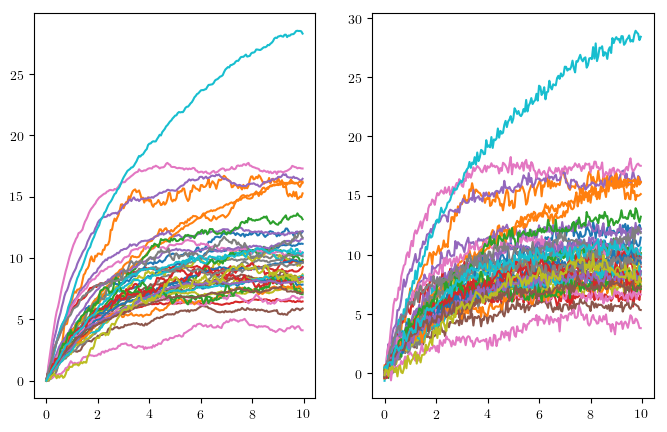

In [63]:
PyPlot.figure(figsize=(8,5))
PyPlot.subplot(121)
PyPlot.plot(t_vec,Array(x')); 
PyPlot.subplot(122)
PyPlot.plot(t_vec,Array(y'));

In [64]:
# load stored results
job = string(M_subjects)*"_"*string(N_time)
R = 60000

chain_σ_ϵ_kalman = Matrix(CSV.read("data/SDEMEM OU/kalman/chain_sigma_epsilon_"*string(100)*"_"*job*".csv",allowmissing=:auto))
chain_σ_ϵ_kalman = Matrix(chain_σ_ϵ_kalman')
chain_η_kalman = Matrix(CSV.read("data/SDEMEM OU/kalman/chain_eta_"*string(100)*"_"*job*".csv",allowmissing=:auto))
chain_η_kalman = Matrix(chain_η_kalman')
chain_ϕ_export = Matrix(CSV.read("data/SDEMEM OU/kalman/chain_phi_"*string(100)*"_"*job*".csv",allowmissing=:auto))
chain_ϕ_export = Matrix(chain_ϕ_export')
chain_ϕ_kalman = zeros(M_subjects,3,R)
idx = 0 
for m = 1:M_subjects
    for j = 1:3
        idx = idx + 1
        chain_ϕ_kalman[m,j,:] = chain_ϕ_export[idx,:]
    end 
end 

simdata_kalman = Matrix(CSV.read("data/SDEMEM OU/kalman/sim_data_"*string(100)*"_"*job*".csv",allowmissing=:auto))
println(simdata_kalman[1])
println(simdata_kalman[2])
println(simdata_kalman[3])
println(simdata_kalman[4])

┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/76SRf/src/CSV.jl:330
┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/76SRf/src/CSV.jl:330
┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/76SRf/src/CSV.jl:330
┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/76SRf/src/CSV.jl:330


72.920385229
0.25208041666666664
0.25811666666666666
1.0


In [65]:
R_long = 60000
adapt = 1
rho = 0.99
sigma_start = 0.3
seed = 100
job_long_5 = string(seed)*"_"*string(sigma_start)*"_"*string(adapt)*"_"*string(R_long)*"_"*string(M_subjects)*"_"*string(N_time)*"_"*string(5)*"_"*string(rho)
job_long_10 = string(seed)*"_"*string(sigma_start)*"_"*string(adapt)*"_"*string(R_long)*"_"*string(M_subjects)*"_"*string(N_time)*"_"*string(10)*"_"*string(rho)



"100_0.3_1_60000_40_200_10_0.99"

In [66]:
job_long_5

"100_0.3_1_60000_40_200_5_0.99"

In [67]:
chain_σ_ϵ_long_5 = Matrix(CSV.read("data/SDEMEM OU/cpmmh for plot mess vs N/chain_sigma_epsilon_"*job_long_5*".csv",allowmissing=:auto))
chain_σ_ϵ_long_5 = Matrix(chain_σ_ϵ_long_5')
chain_η_long_5 = Matrix(CSV.read("data/SDEMEM OU/cpmmh for plot mess vs N/chain_eta_"*job_long_5*".csv",allowmissing=:auto))
chain_η_long_5 = Matrix(chain_η_long_5')
chain_ϕ_export = Matrix(CSV.read("data/SDEMEM OU/cpmmh for plot mess vs N/chain_phi_"*job_long_5*".csv",allowmissing=:auto))
chain_ϕ_export = Matrix(chain_ϕ_export')
chain_ϕ_long_5 = zeros(M_subjects,3,R_long)
idx = 0 
for m = 1:M_subjects
    for j = 1:3
        idx = idx + 1
        chain_ϕ_long_5[m,j,:] = chain_ϕ_export[idx,:]
    end 
end 

simdata_long_5 = Matrix(CSV.read("data/SDEMEM OU/cpmmh for plot mess vs N/sim_data_"*job_long_5*".csv",allowmissing=:auto))
println(simdata_long_5[1])
println(simdata_long_5[2])
println(simdata_long_5[3])
println(simdata_long_5[4])

┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/76SRf/src/CSV.jl:330
┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/76SRf/src/CSV.jl:330
┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/76SRf/src/CSV.jl:330
┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/76SRf/src/CSV.jl:330


1505.600924107
0.1830375
0.21803333333333333
1.0


In [68]:
chain_σ_ϵ_long_10 = Matrix(CSV.read("data/SDEMEM OU/cpmmh for plot mess vs N/chain_sigma_epsilon_"*job_long_10*".csv",allowmissing=:auto))
chain_σ_ϵ_long_10 = Matrix(chain_σ_ϵ_long_10')
chain_η_long_10 = Matrix(CSV.read("data/SDEMEM OU/cpmmh for plot mess vs N/chain_eta_"*job_long_10*".csv",allowmissing=:auto))
chain_η_long_10 = Matrix(chain_η_long_10')
chain_ϕ_export = Matrix(CSV.read("data/SDEMEM OU/cpmmh for plot mess vs N/chain_phi_"*job_long_10*".csv",allowmissing=:auto))
chain_ϕ_export = Matrix(chain_ϕ_export')
chain_ϕ_long_10 = zeros(M_subjects,3,R_long)
idx = 0 
for m = 1:M_subjects
    for j = 1:3
        idx = idx + 1
        chain_ϕ_long_10[m,j,:] = chain_ϕ_export[idx,:]
    end 
end 

simdata_long_10 = Matrix(CSV.read("data/SDEMEM OU/cpmmh for plot mess vs N/sim_data_"*job_long_10*".csv",allowmissing=:auto))
println(simdata_long_10[1])
println(simdata_long_10[2])
println(simdata_long_10[3])
println(simdata_long_10[4])

┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/76SRf/src/CSV.jl:330
┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/76SRf/src/CSV.jl:330
┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/76SRf/src/CSV.jl:330
┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/76SRf/src/CSV.jl:330


2036.948748858
0.24067666666666668
0.21673333333333333
1.0


Plot sigma_eps trace plots 

In [69]:
burn_in_trace = 1

1

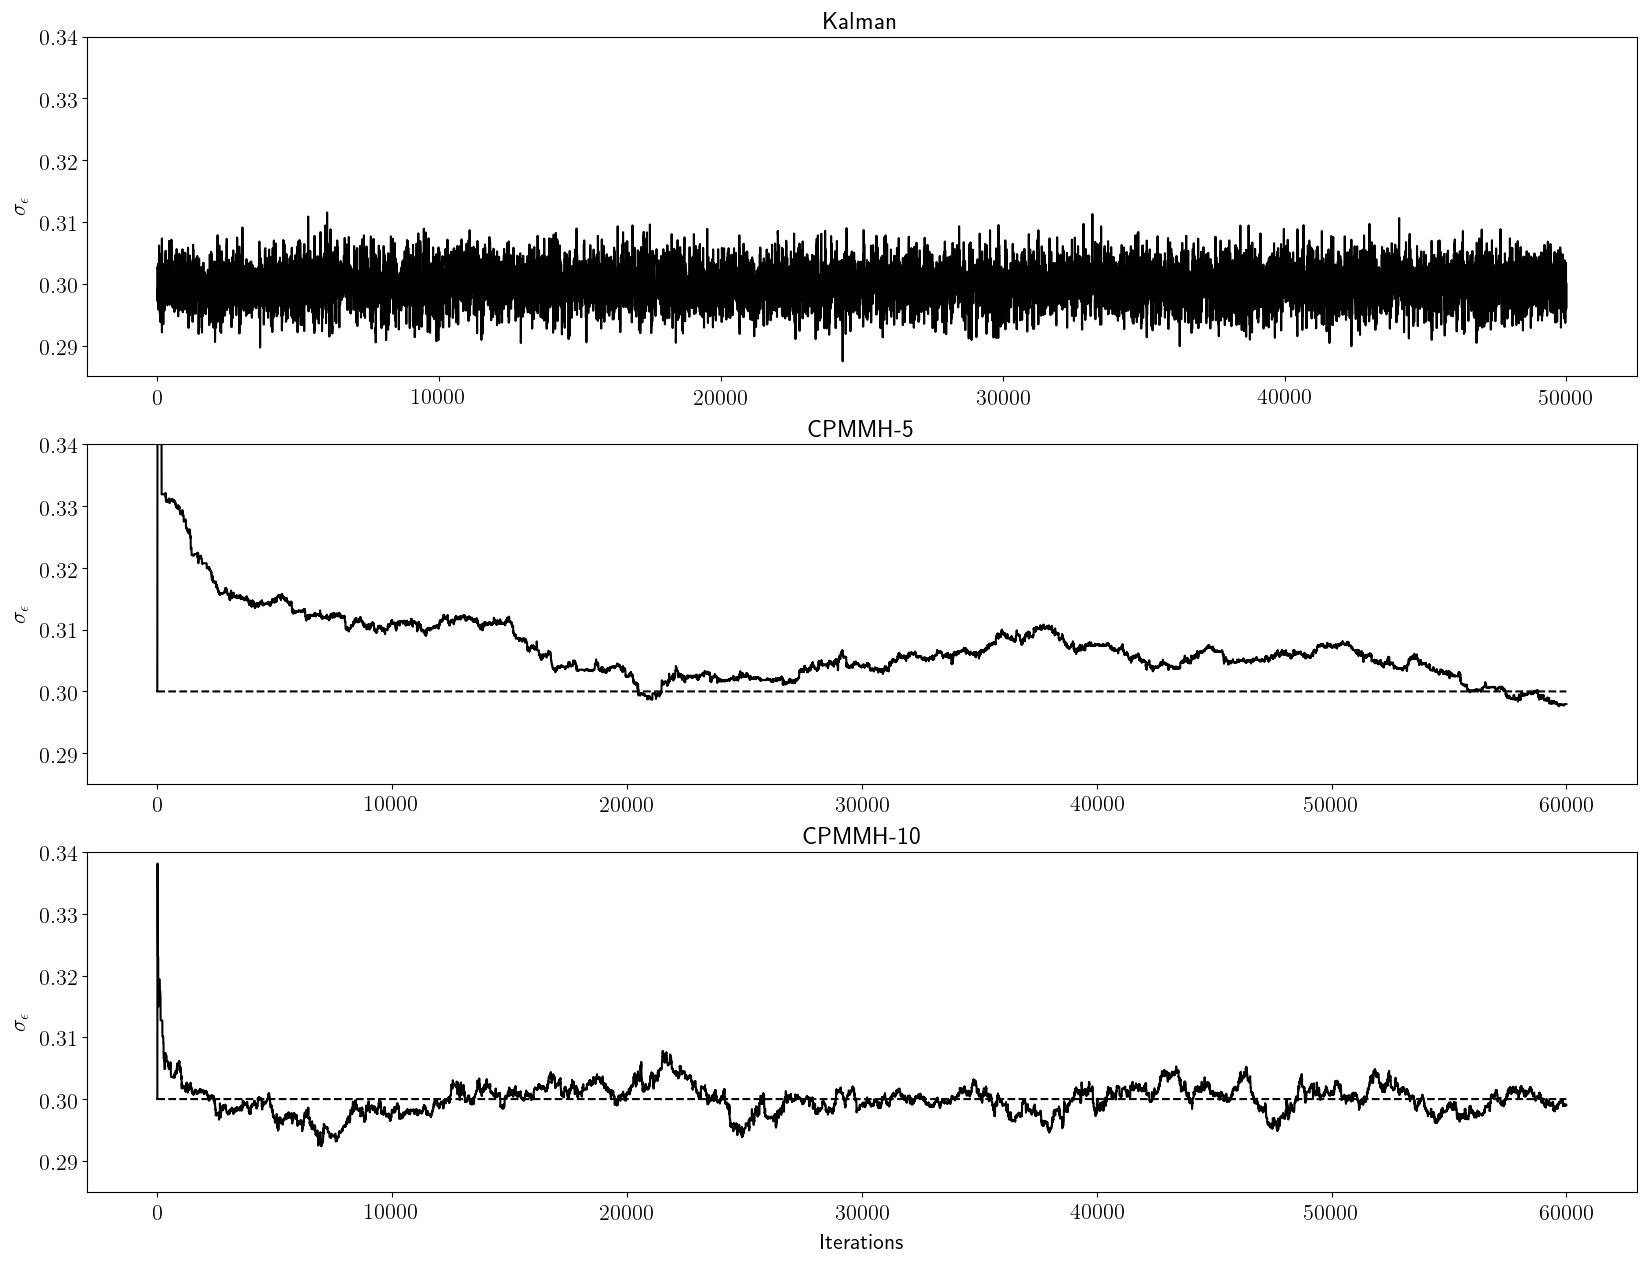

In [70]:
PyPlot.figure(figsize=(20,15))

PyPlot.subplot(3,1,1)
PyPlot.plot(chain_σ_ϵ_kalman[1,10000:end], "k")
PyPlot.plot(σ_ϵ*ones(R-10000), "k--")
PyPlot.ylim(0.285, 0.34)
PyPlot.xticks(fontsize=16)
PyPlot.yticks(fontsize=16)
PyPlot.ylabel(L"\sigma_{\epsilon}",fontsize=16)
#PyPlot.xlabel("Iterations");
PyPlot.title("Kalman",fontsize=18)

PyPlot.subplot(3,1,2)
PyPlot.plot(chain_σ_ϵ_long_5[1,burn_in_trace:end], "k")
PyPlot.plot(σ_ϵ*ones(R_long-burn_in_trace), "k--")
PyPlot.ylabel(L"\sigma_{\epsilon}",fontsize=16)
PyPlot.ylim(0.285, 0.34)
PyPlot.xticks(fontsize=16)
PyPlot.yticks(fontsize=16)
#PyPlot.xlabel("Iterations");
PyPlot.title("CPMMH-5",fontsize=18)

PyPlot.subplot(3,1,3)
PyPlot.plot(chain_σ_ϵ_long_10[burn_in_trace:end], "k")
PyPlot.plot(σ_ϵ*ones(R_long-burn_in_trace), "k--")
PyPlot.ylim(0.285, 0.34)
PyPlot.xticks(fontsize=16)
PyPlot.yticks(fontsize=16)
PyPlot.ylabel(L"\sigma_{\epsilon}",fontsize=16)
PyPlot.xlabel("Iterations",fontsize=16);
PyPlot.title("CPMMH-10",fontsize=18)

PyPlot.savefig("figures/trace_sigma_eps_low_N_bootstap_ou.png")



In [71]:
burn_in_trace = 10000

10000

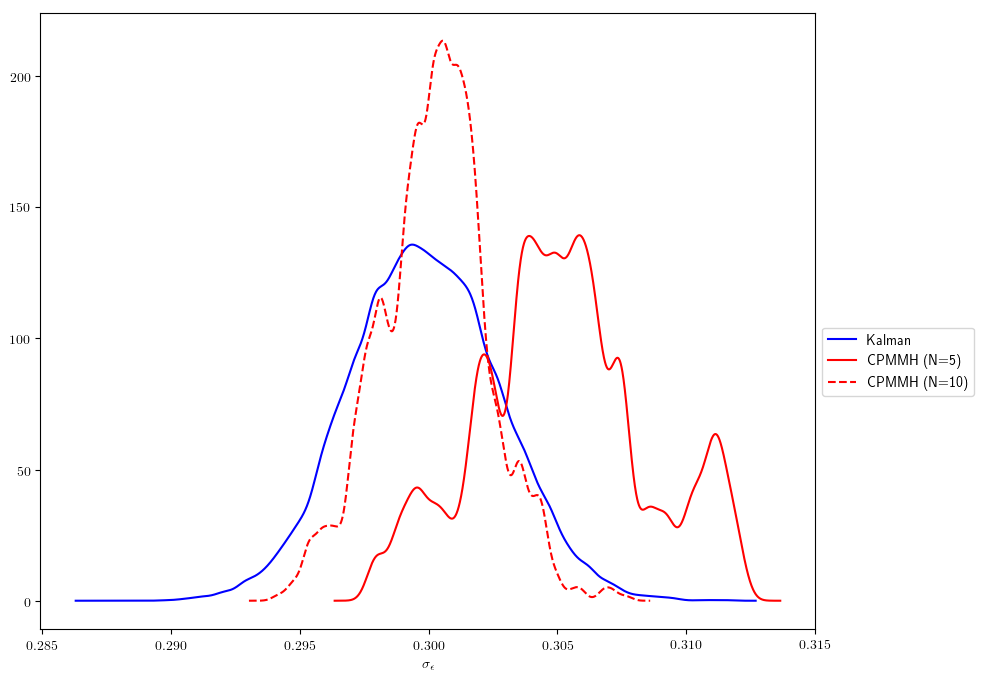

PyObject <matplotlib.legend.Legend object at 0x7f3a99a22860>

In [72]:
# TODO scaling????

posterior_kalman = kde(chain_σ_ϵ_kalman[1000:end])
posterior_cpmmh_5 = kde(chain_σ_ϵ_long_5[burn_in_trace:end])
posterior_cpmmh_10 = kde(chain_σ_ϵ_long_10[burn_in_trace:end])

PyPlot.figure(figsize=(10,8))
PyPlot.plot(posterior_kalman.x,posterior_kalman.density, "b", label = "Kalman")
PyPlot.plot(posterior_cpmmh_5.x,posterior_cpmmh_5.density, "r", label = "CPMMH (N=5)")
PyPlot.plot(posterior_cpmmh_10.x,posterior_cpmmh_10.density, "--r", label = "CPMMH (N=10)")
PyPlot.xlabel(L"\sigma_{\epsilon}")
PyPlot.legend(loc="upper left", bbox_to_anchor=(1, 0.5))



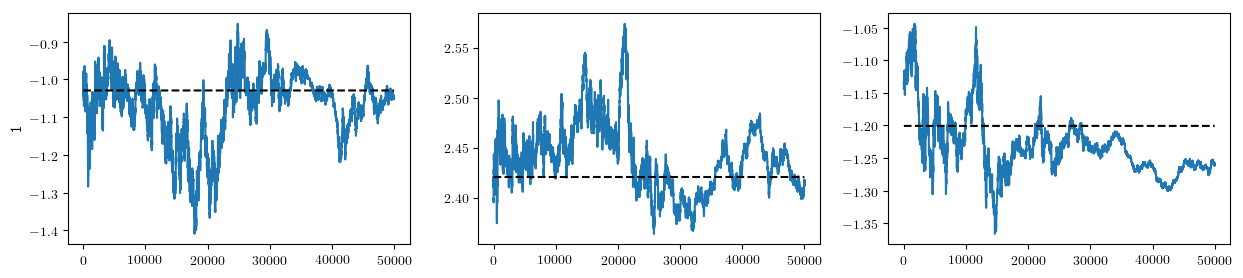

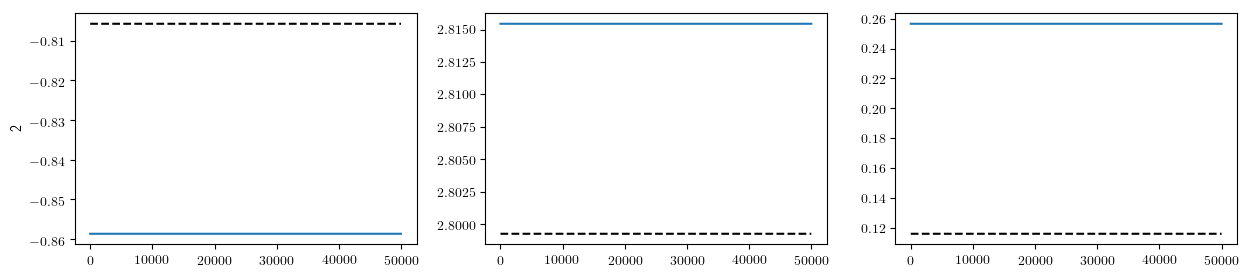

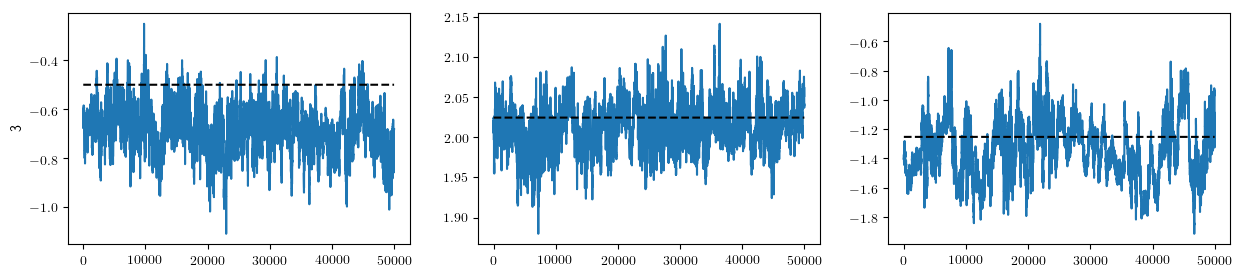

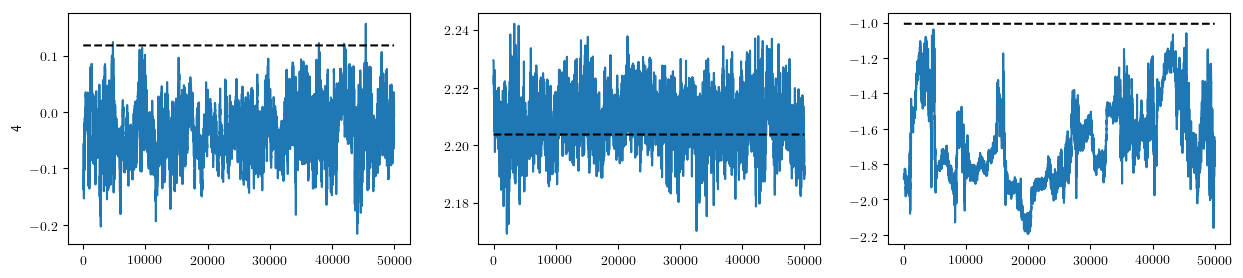

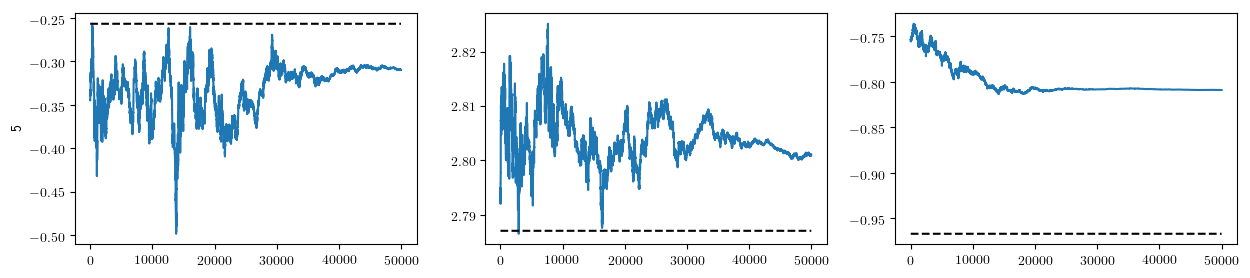

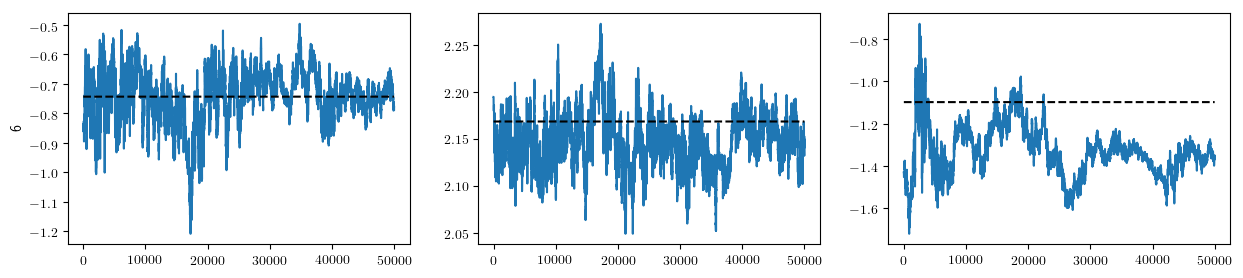

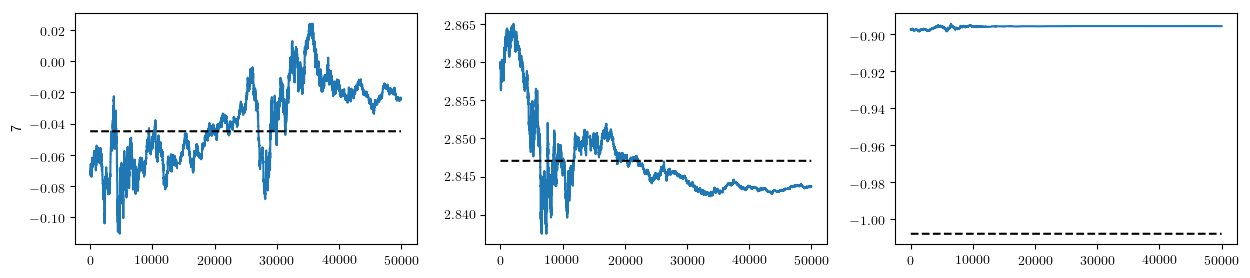

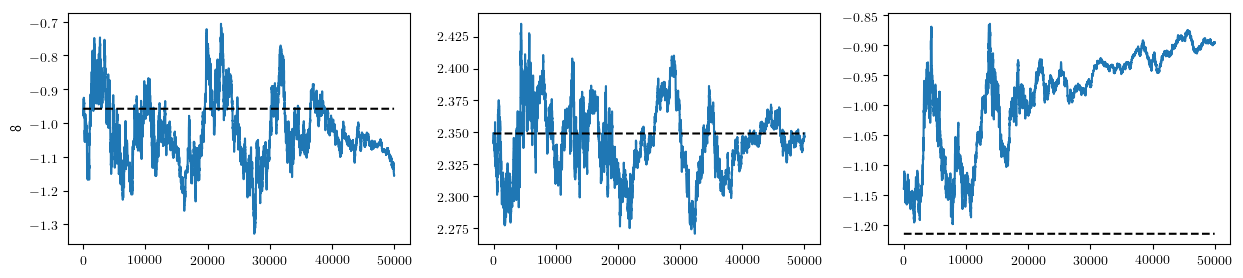

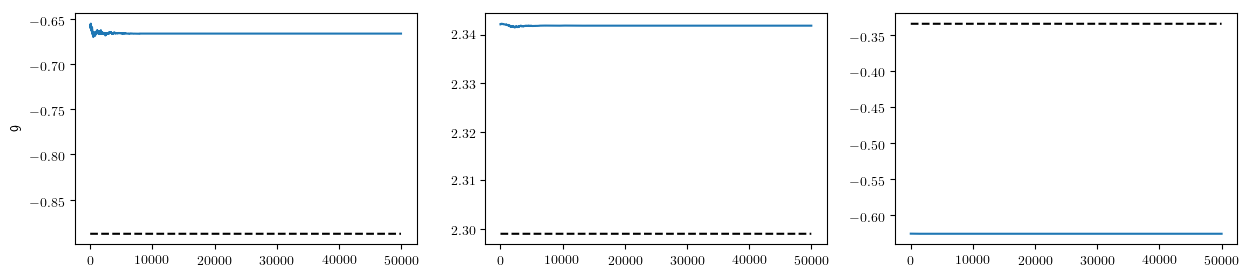

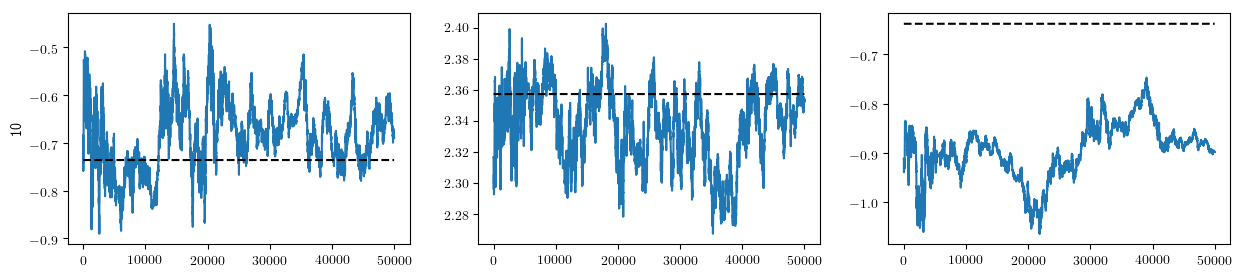

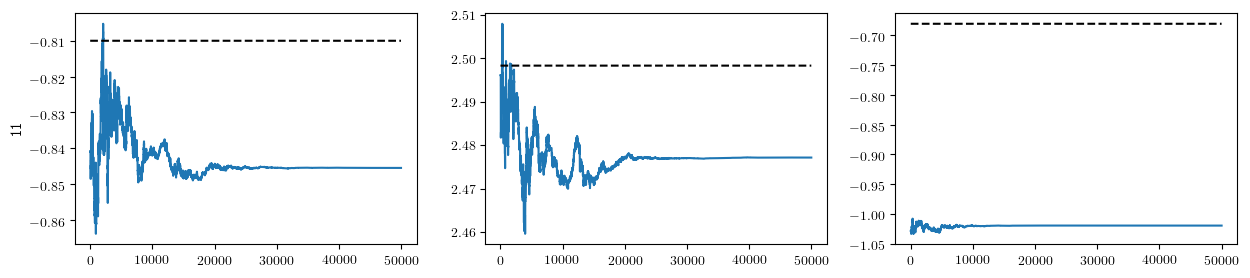

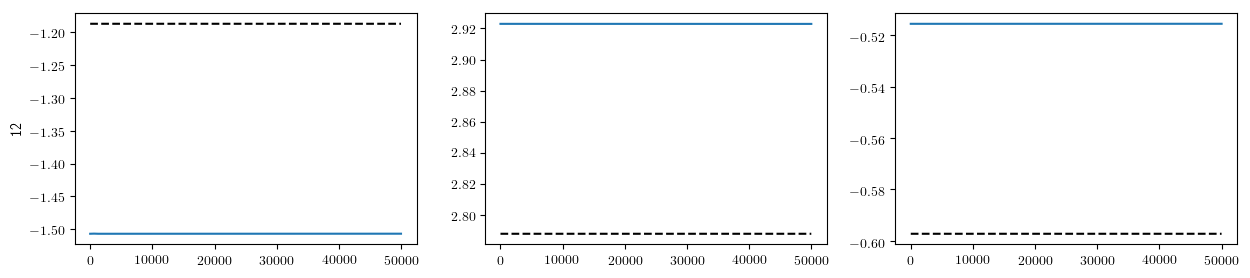

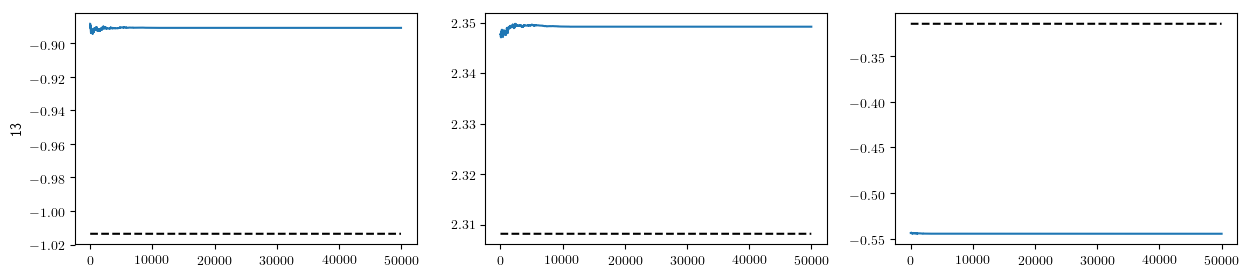

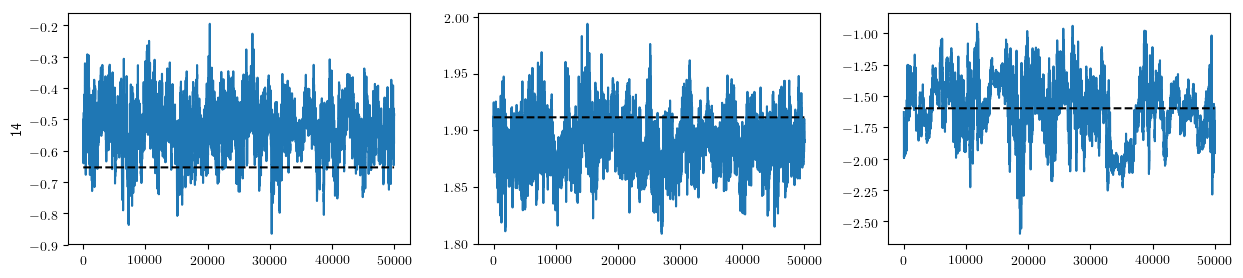

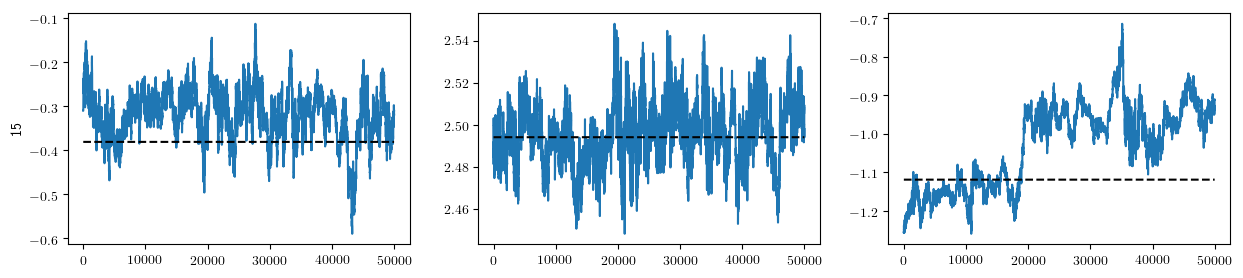

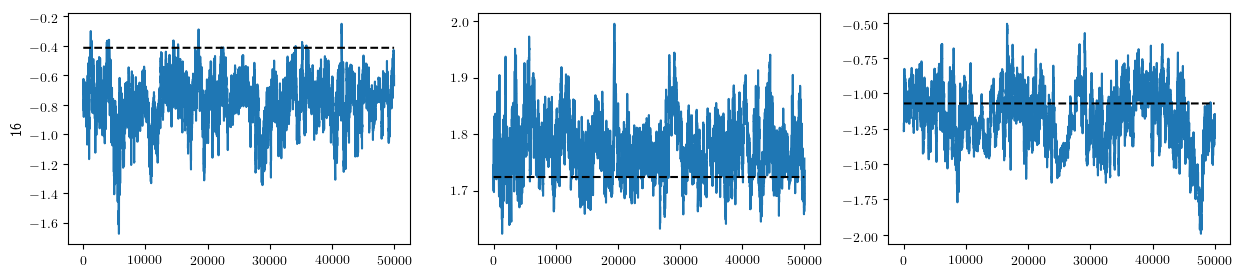

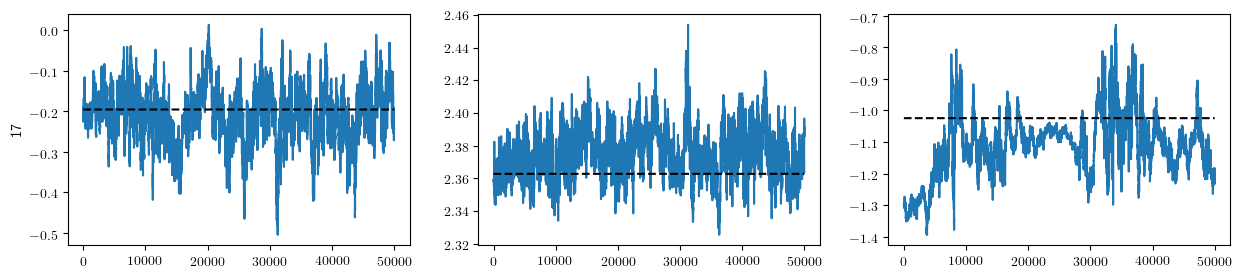

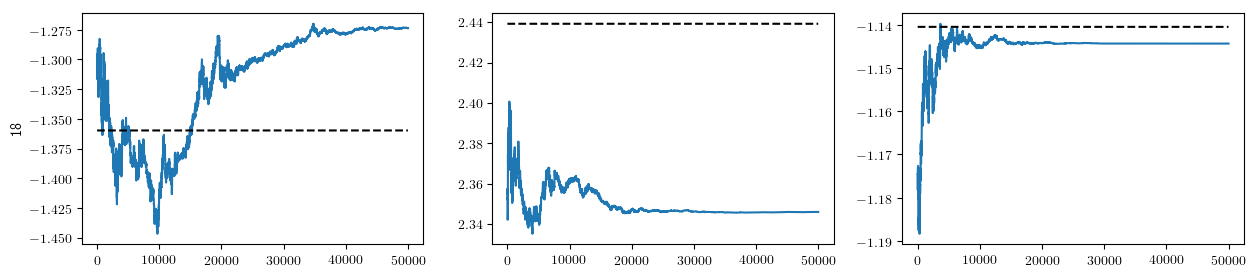

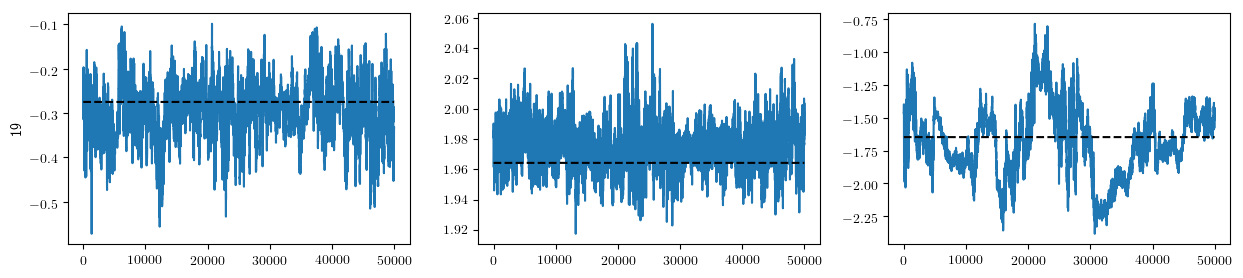

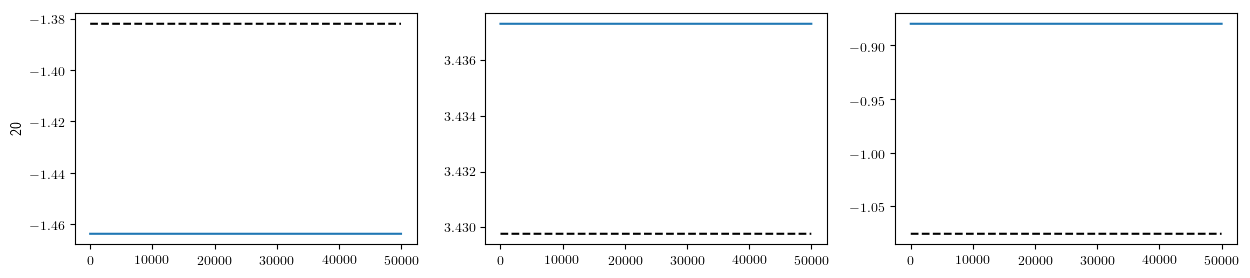

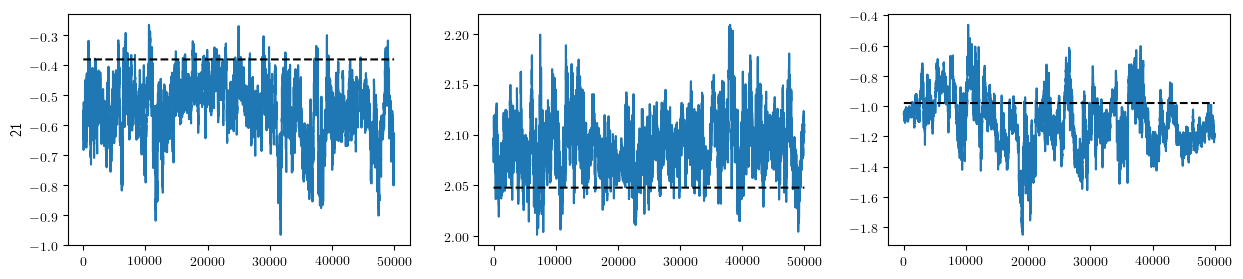

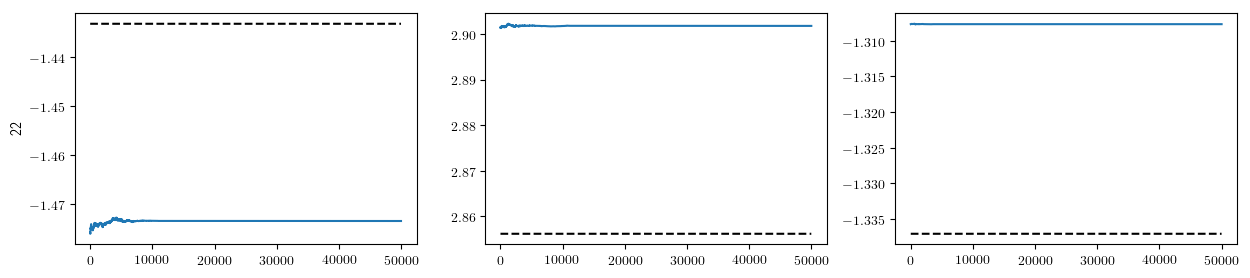

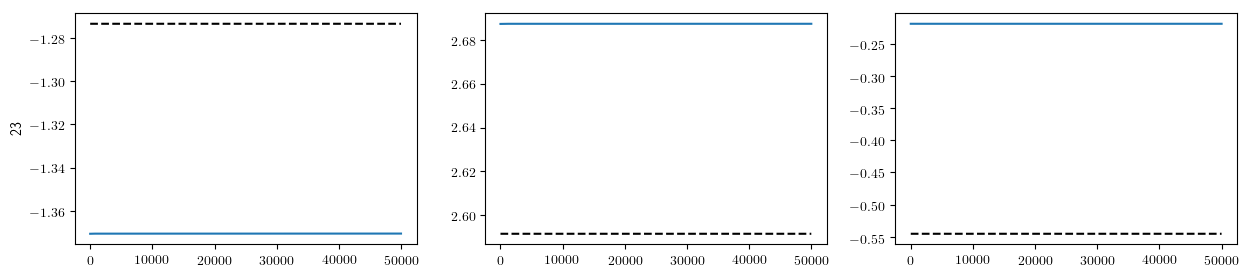

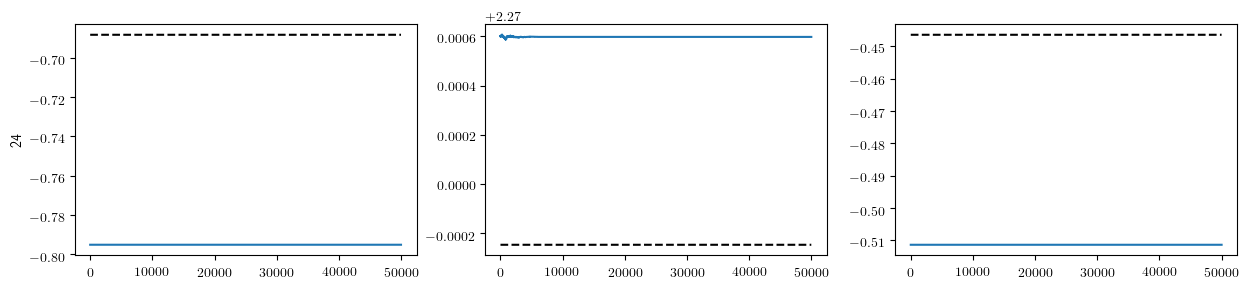

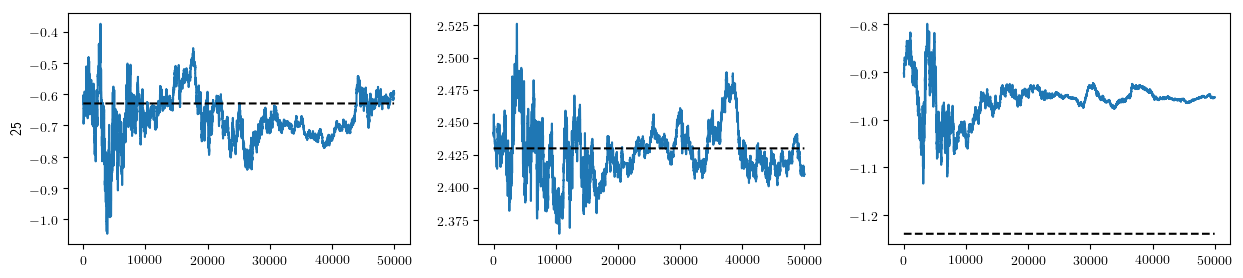

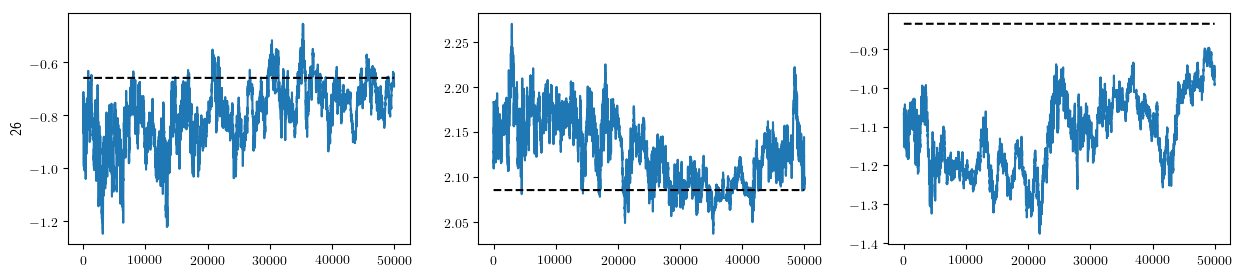

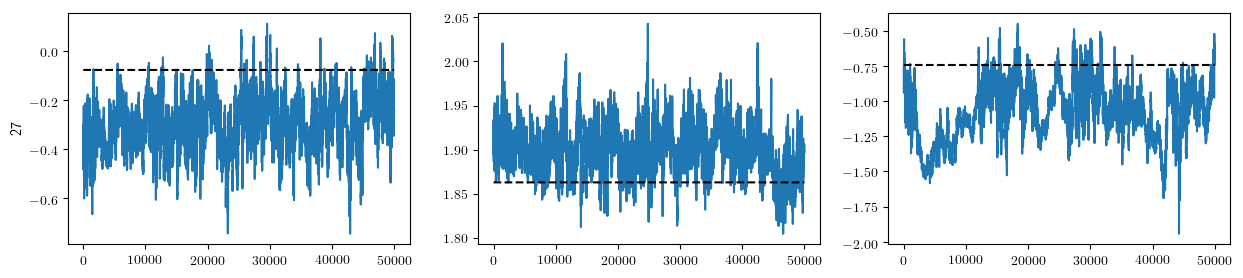

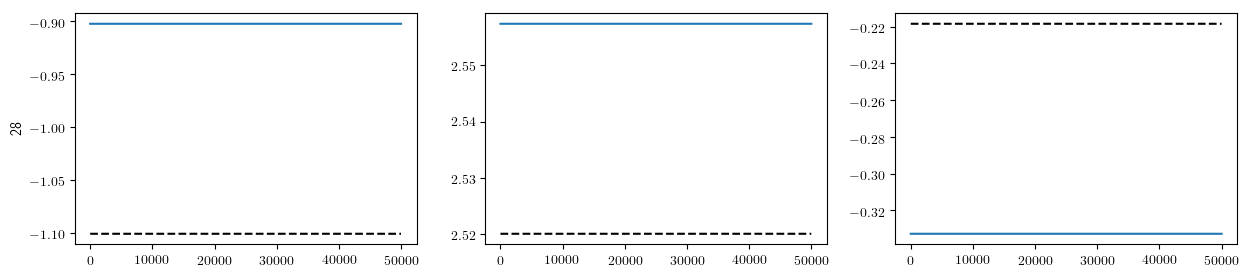

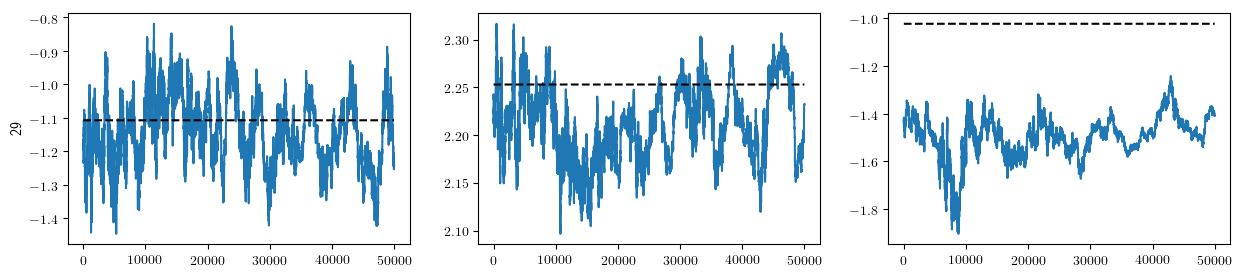

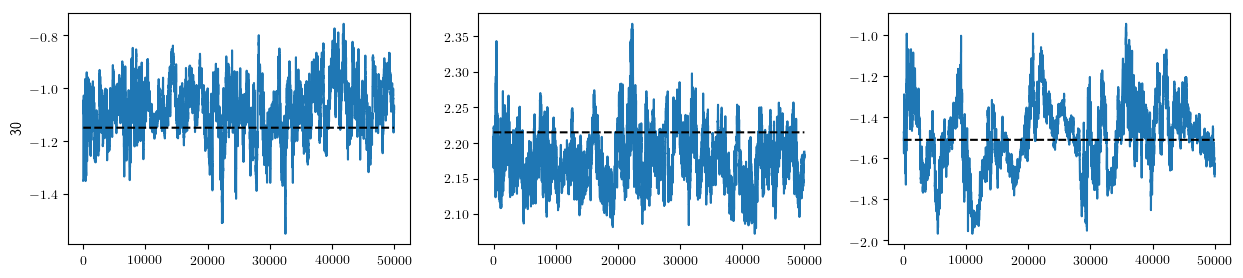

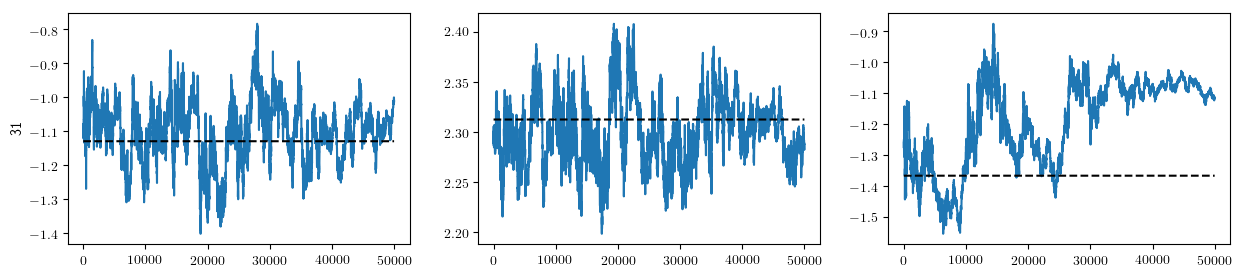

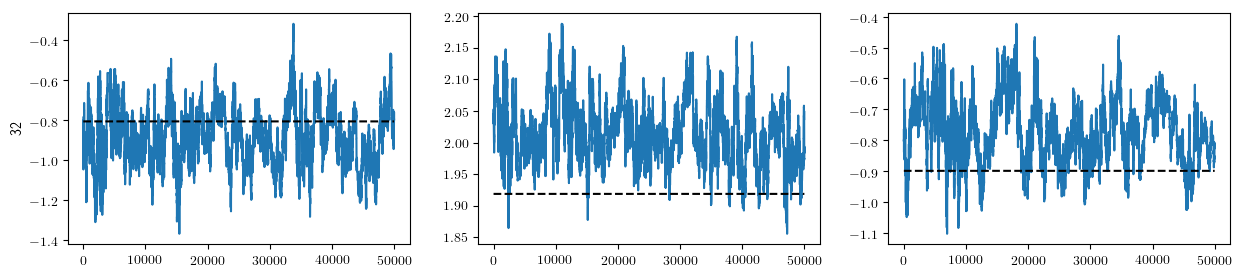

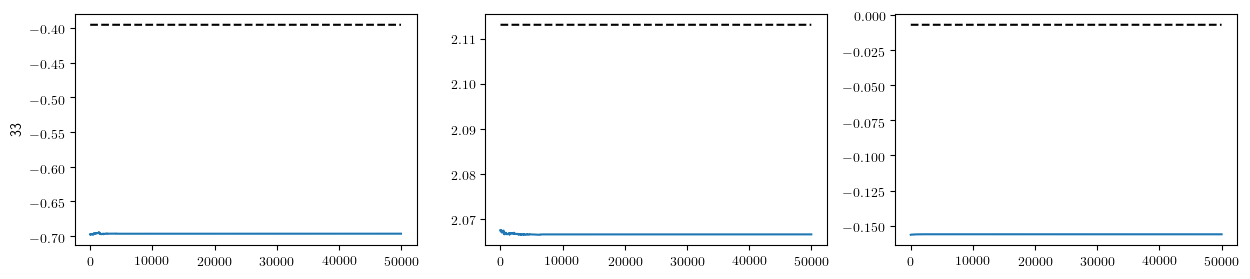

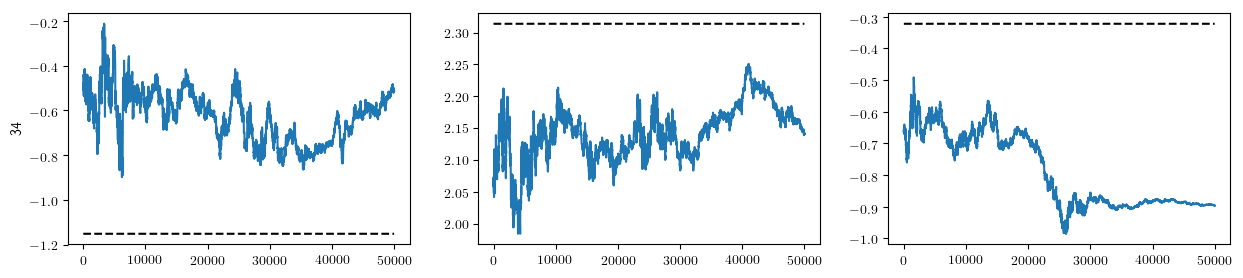

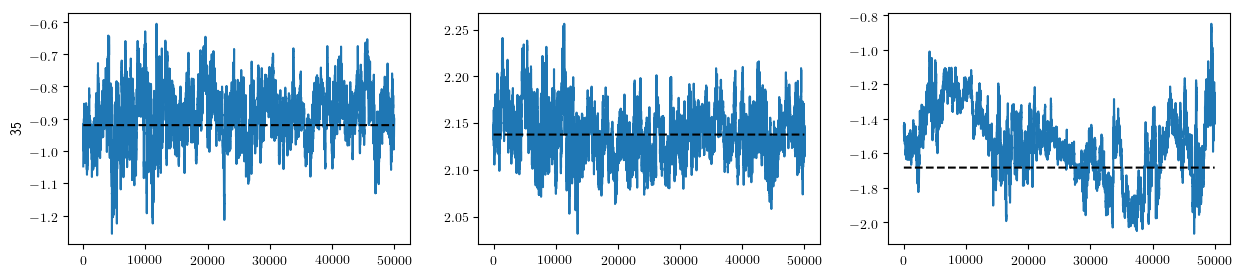

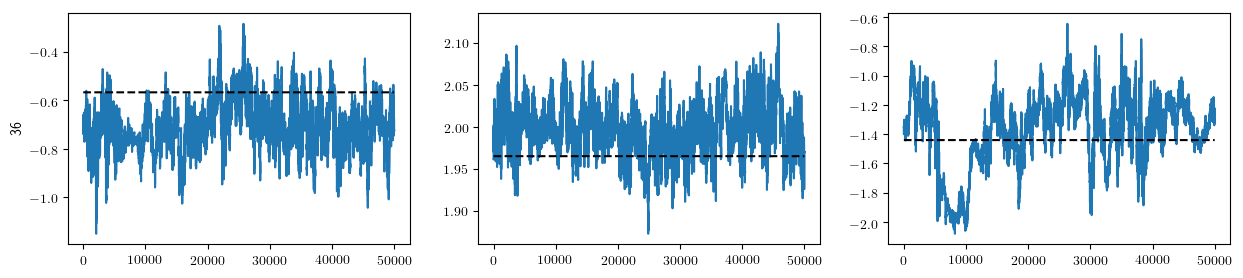

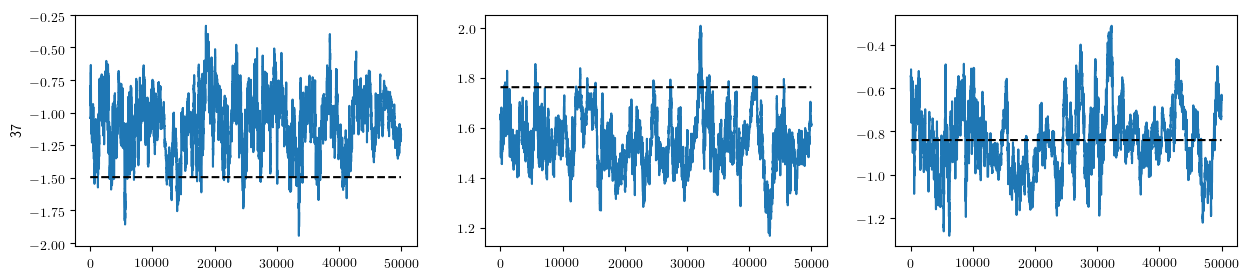

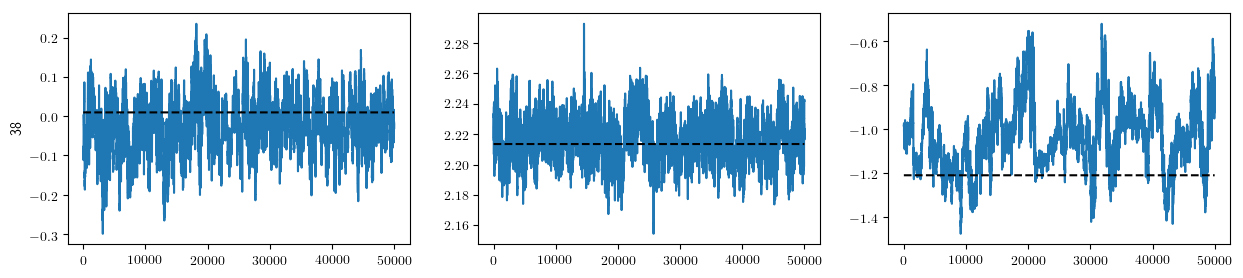

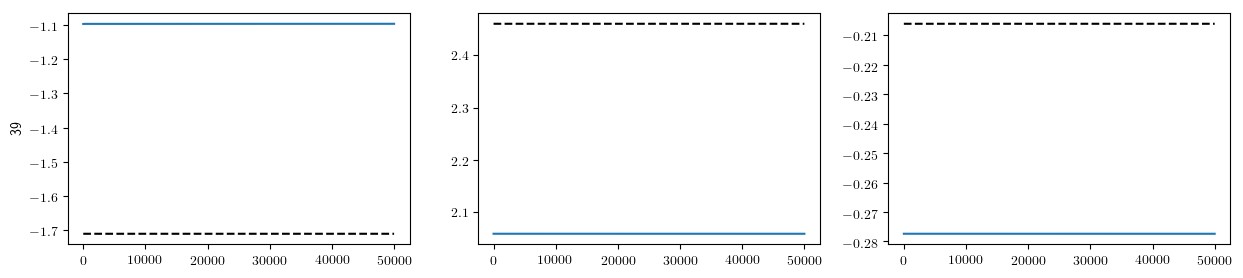

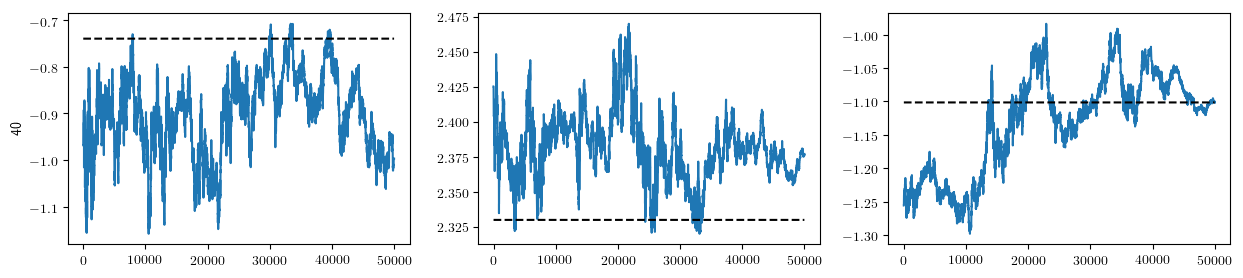

In [32]:
for i in 1:M_subjects
    
    PyPlot.figure(figsize=(15,3))
    
    ax1 = PyPlot.subplot(1,3,1)

    PyPlot.plot(chain_ϕ_long_5[i,1,burn_in_trace:end])
    PyPlot.plot(ϕ[i,1]*ones(R-burn_in_trace), "k--");
    PyPlot.ylabel(i)

    ax1 = PyPlot.subplot(1,3,2)
    PyPlot.plot(chain_ϕ_long_5[i,2,burn_in_trace:end])
    PyPlot.plot(ϕ[i,2]*ones(R-burn_in_trace), "k--");

    ax1 = PyPlot.subplot(1,3,3)
    PyPlot.plot(chain_ϕ_long_5[i,3,burn_in_trace:end])
    PyPlot.plot(ϕ[i,3]*ones(R-burn_in_trace), "k--");
end 

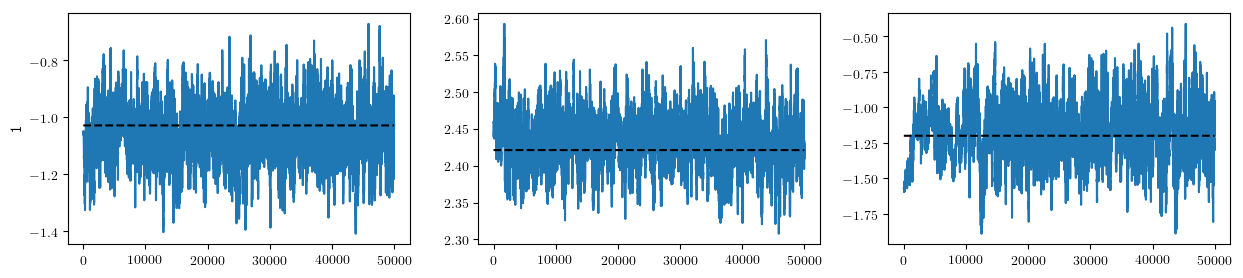

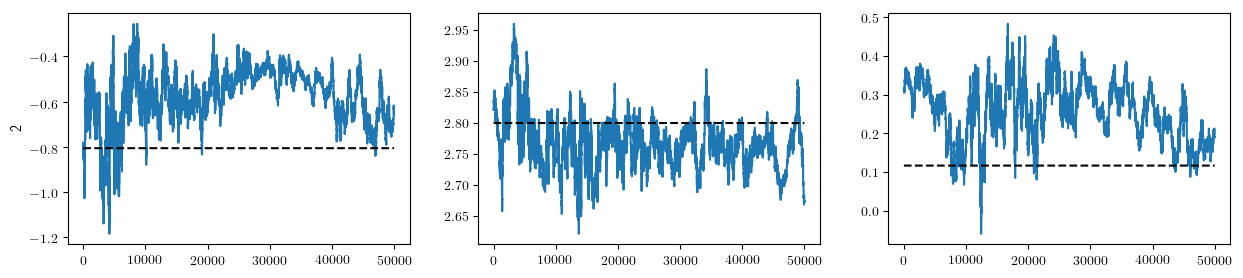

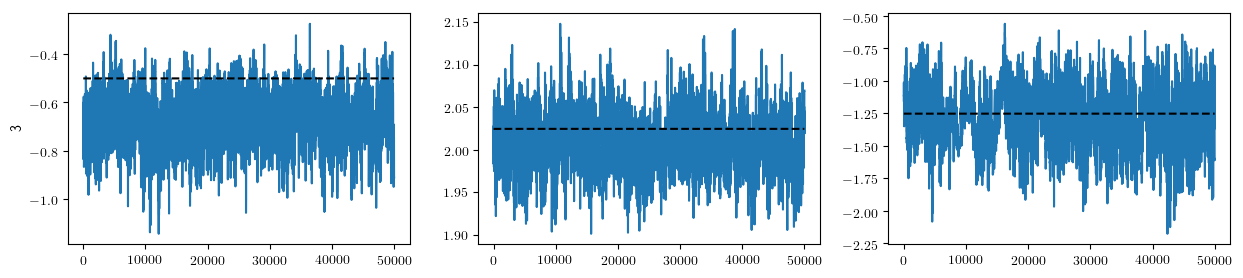

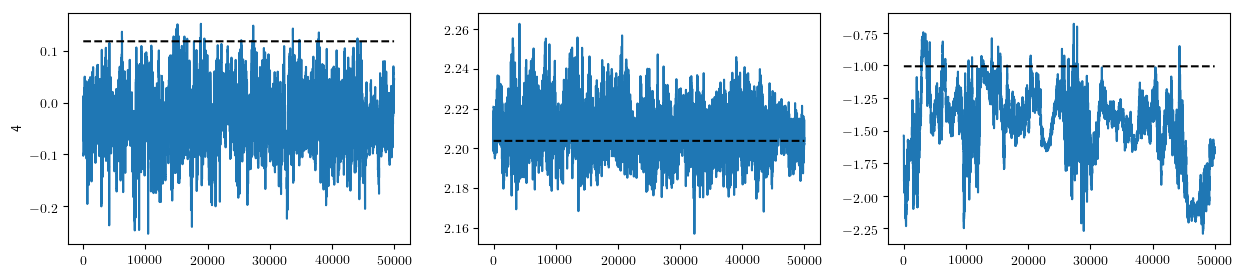

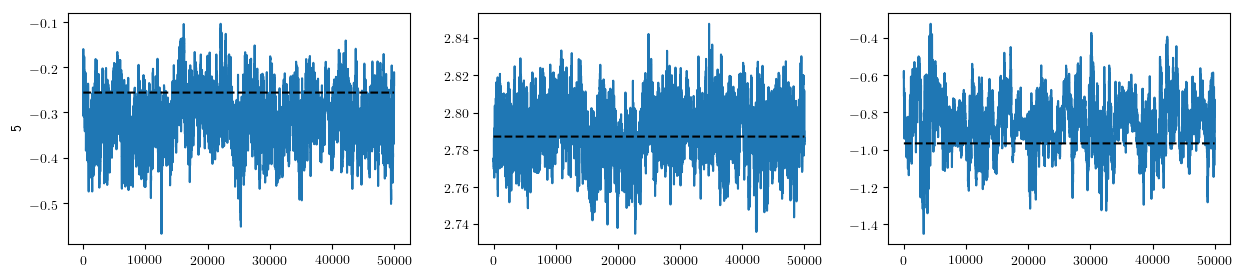

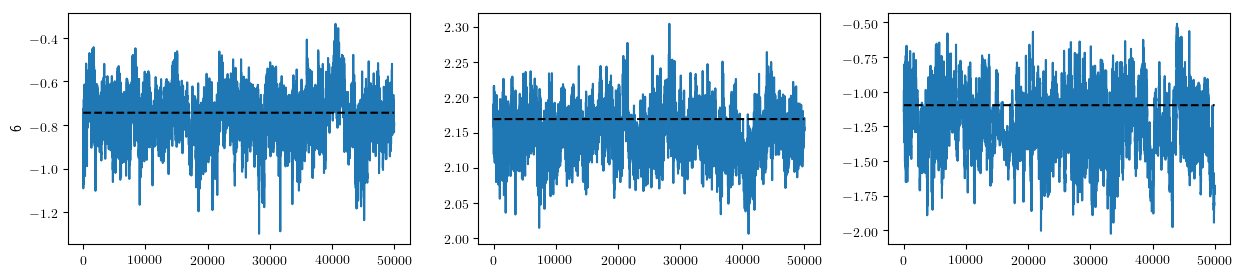

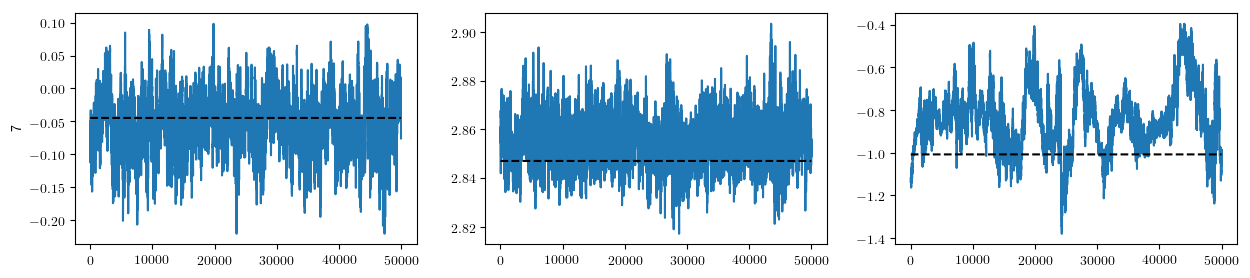

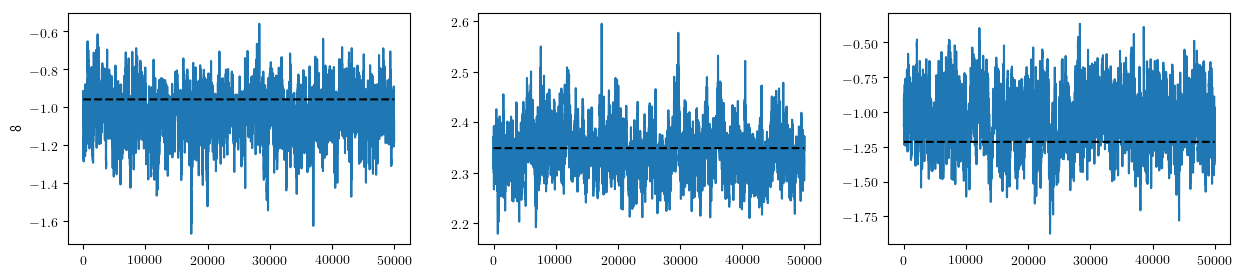

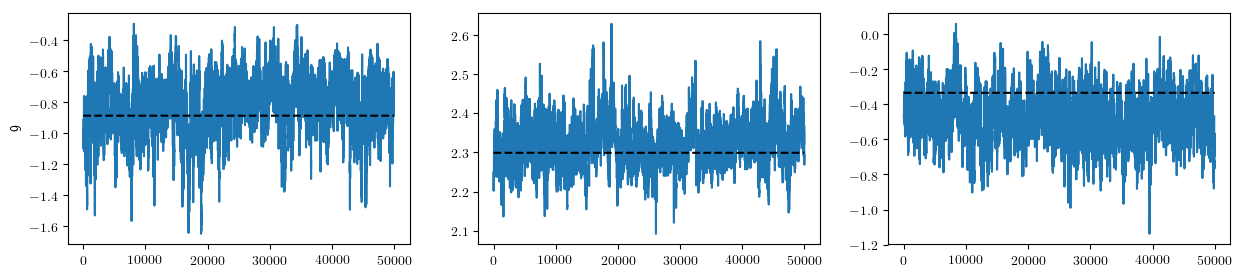

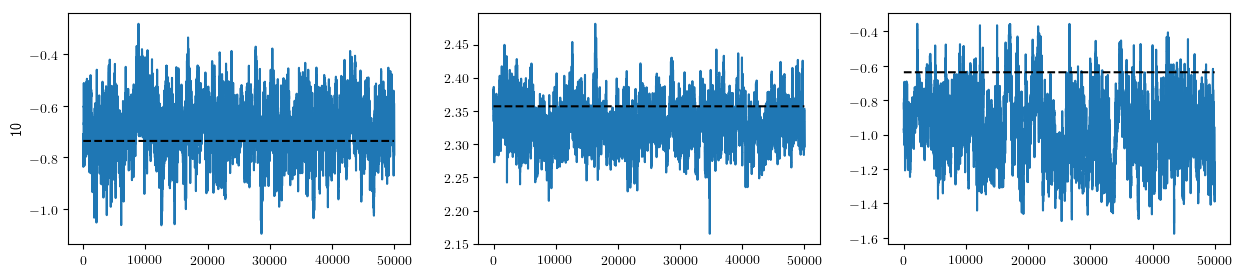

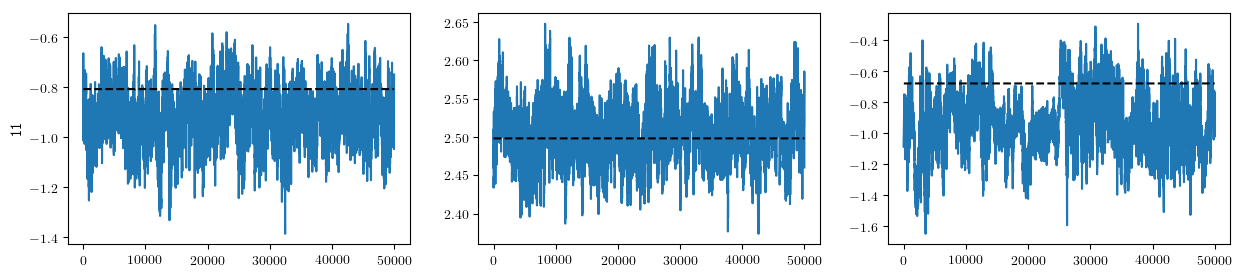

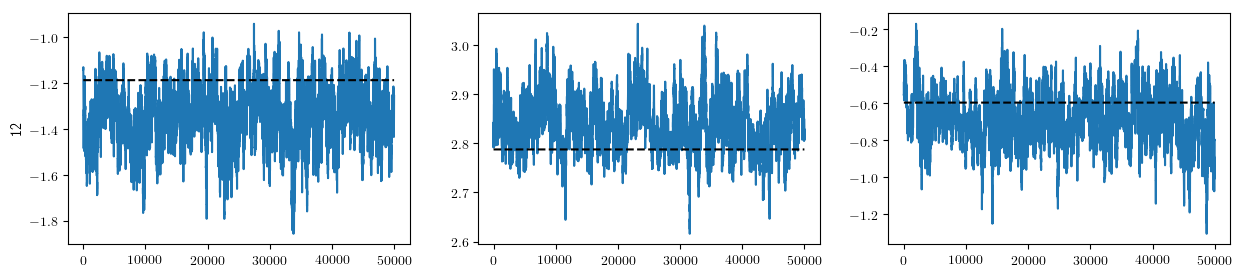

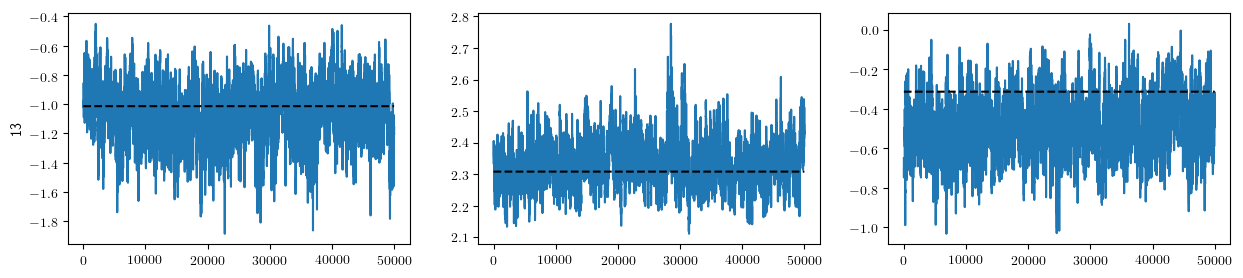

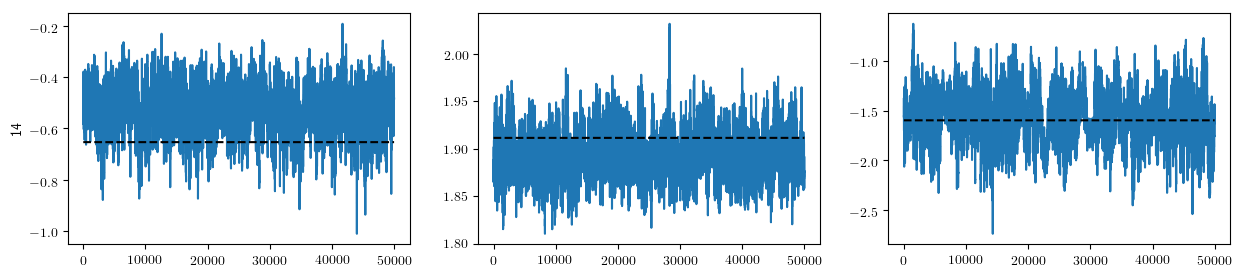

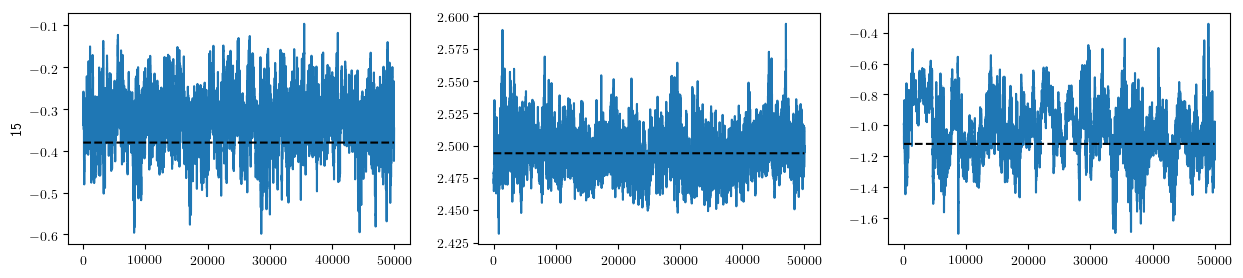

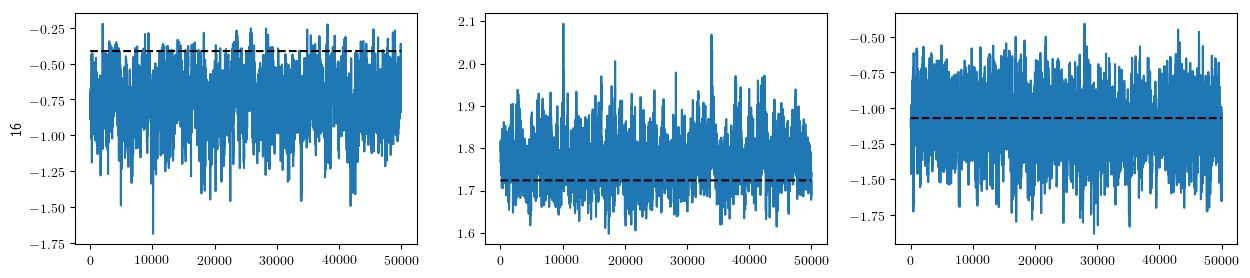

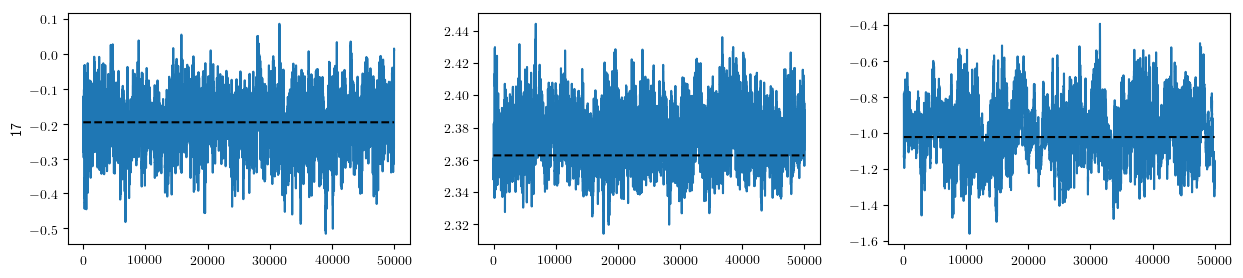

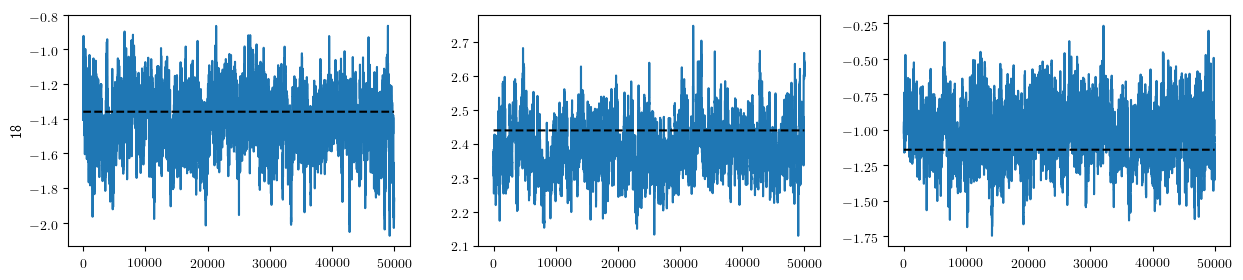

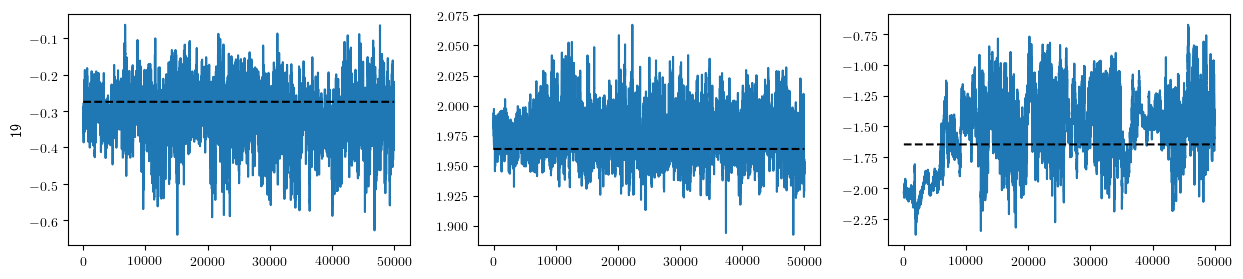

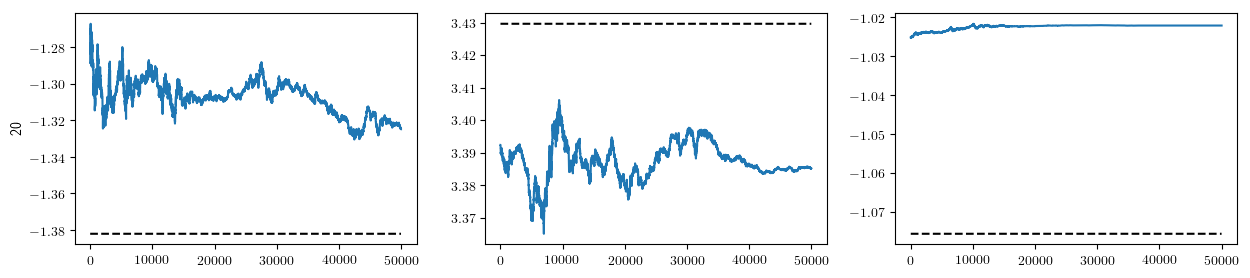

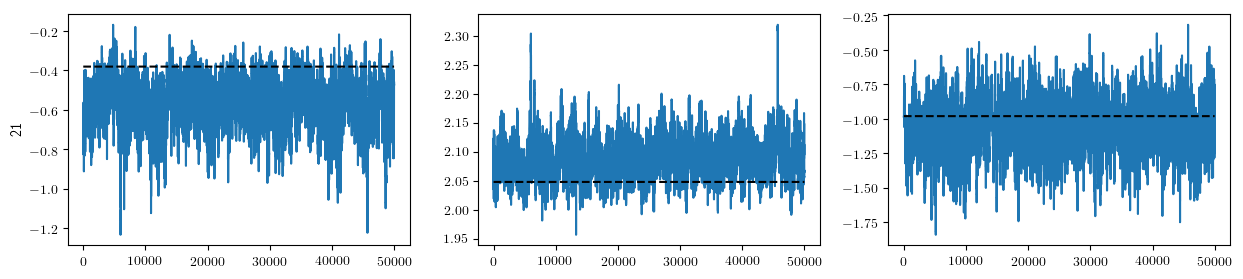

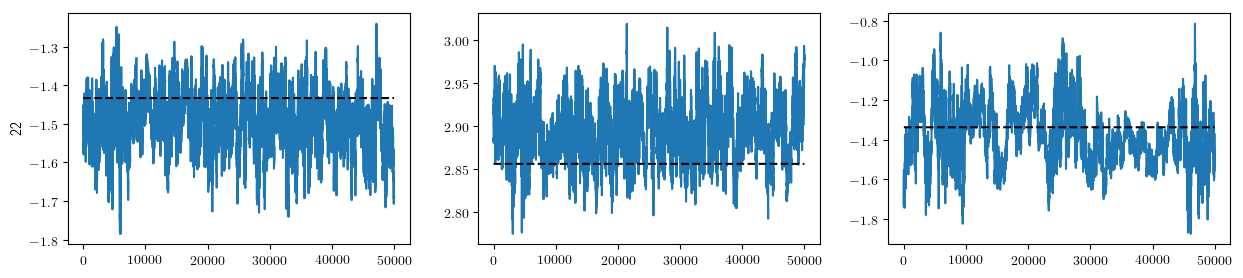

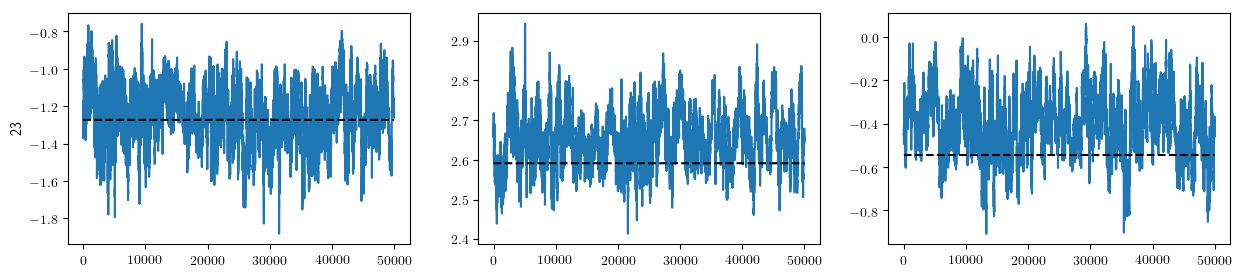

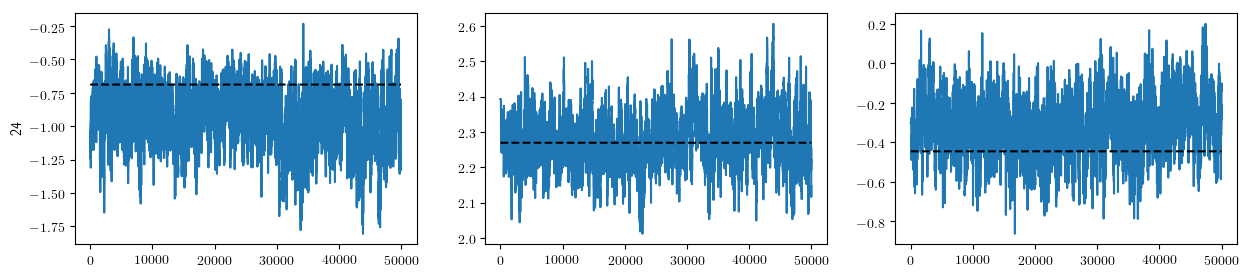

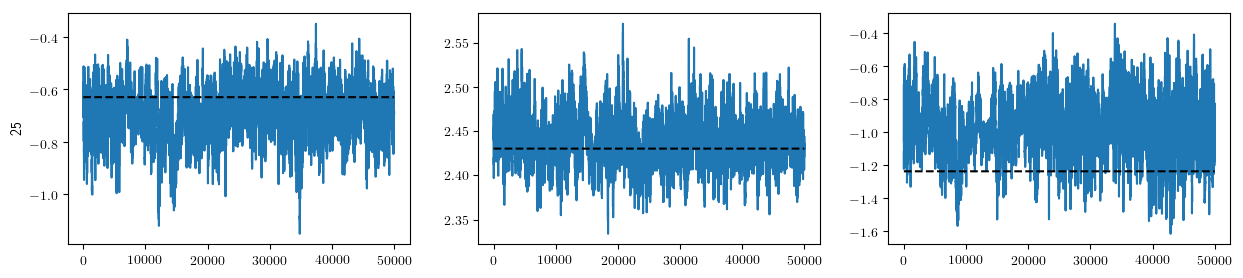

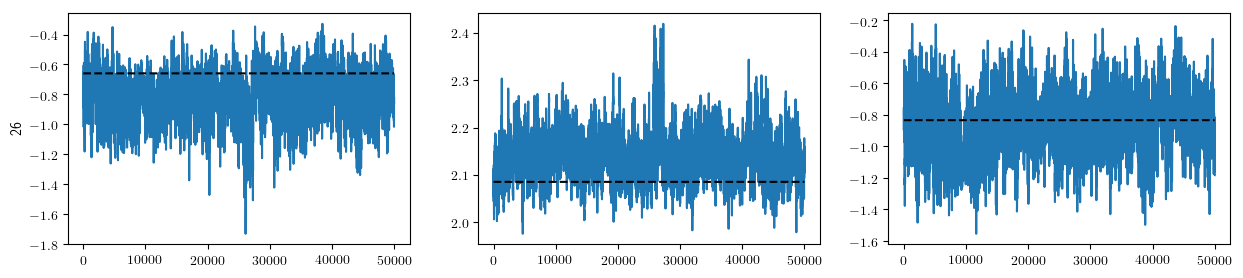

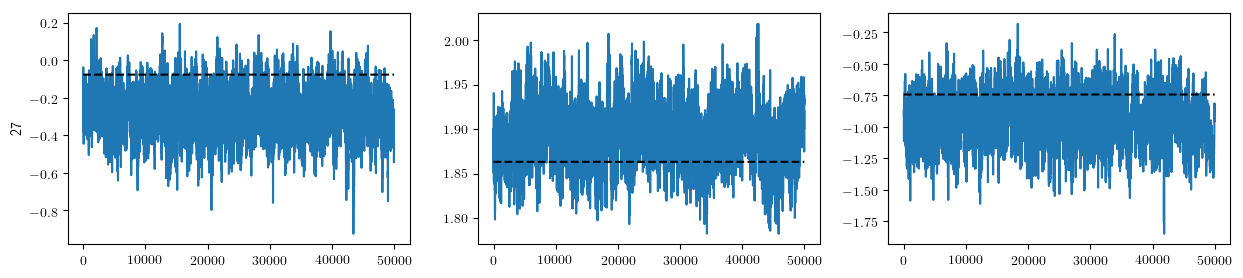

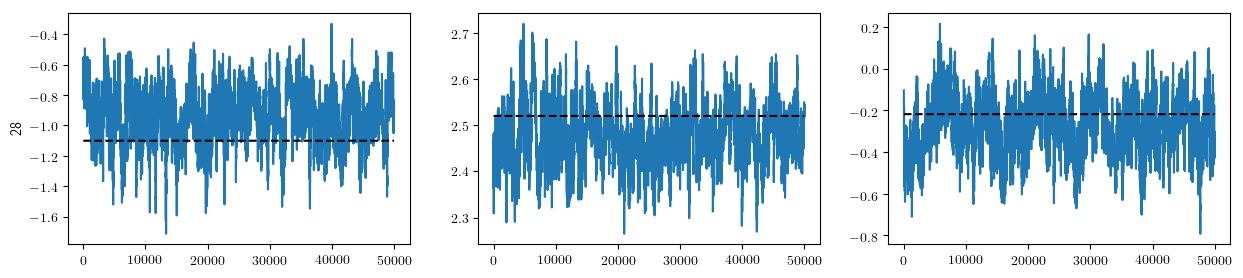

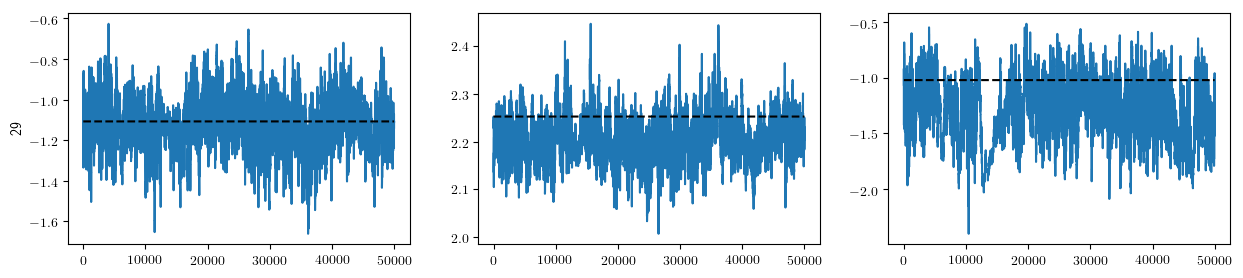

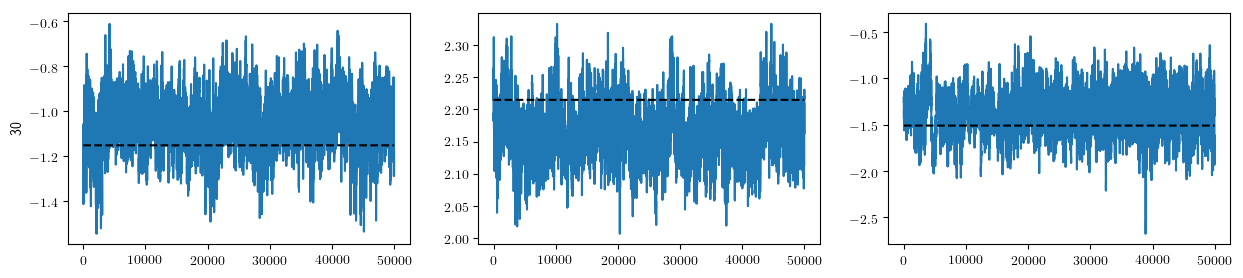

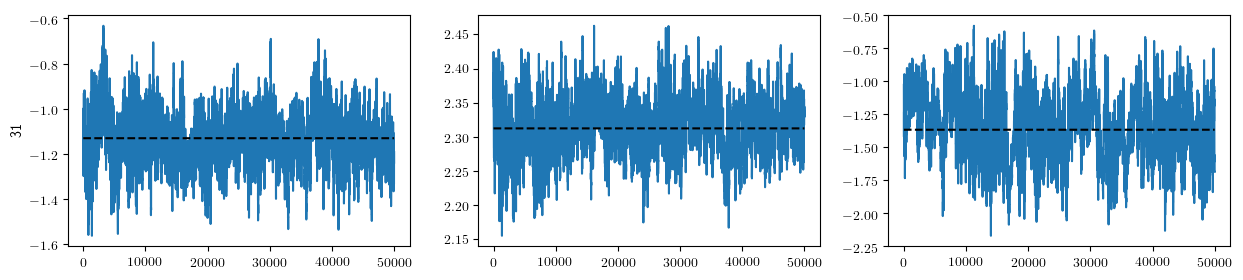

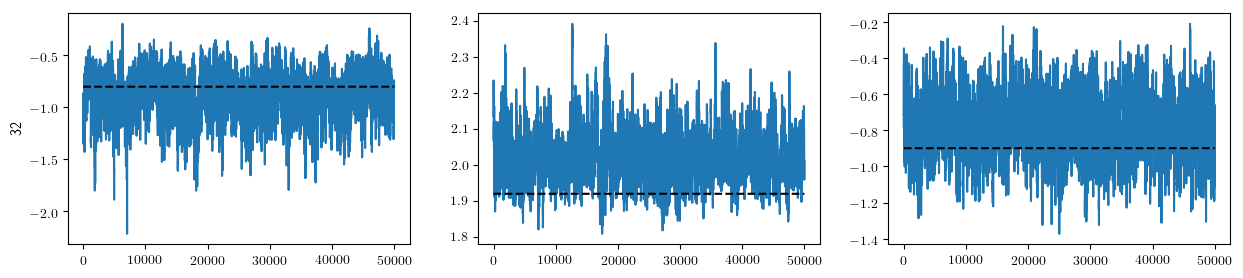

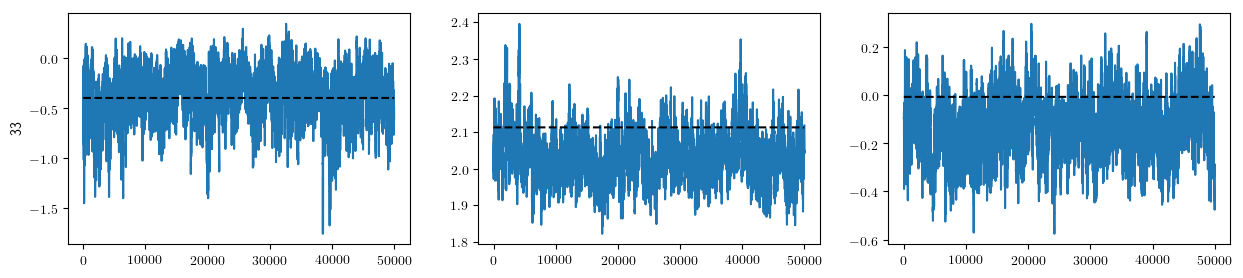

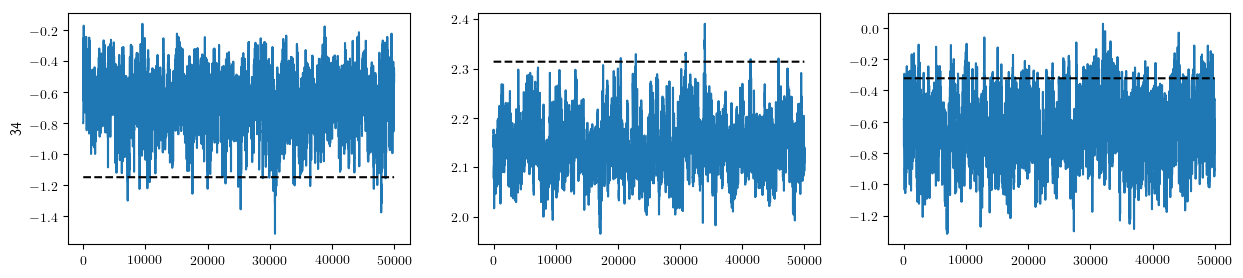

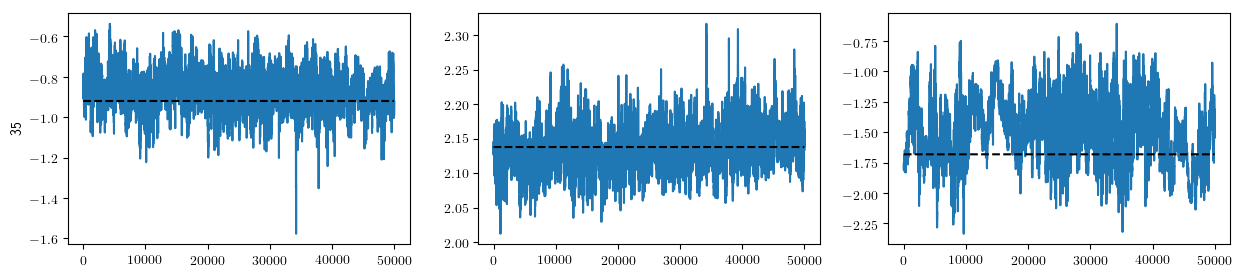

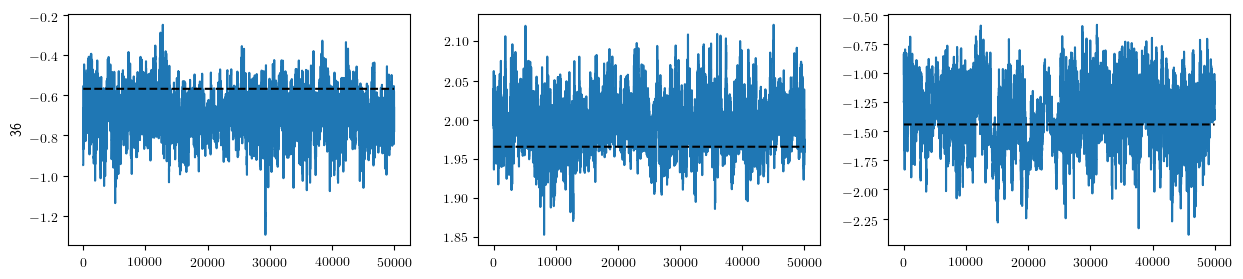

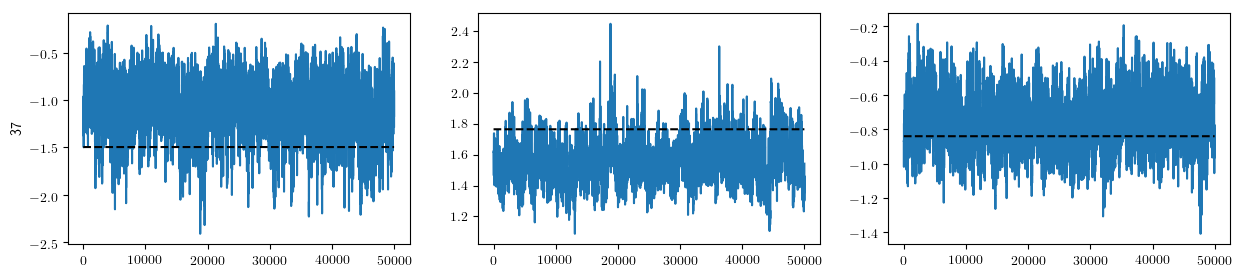

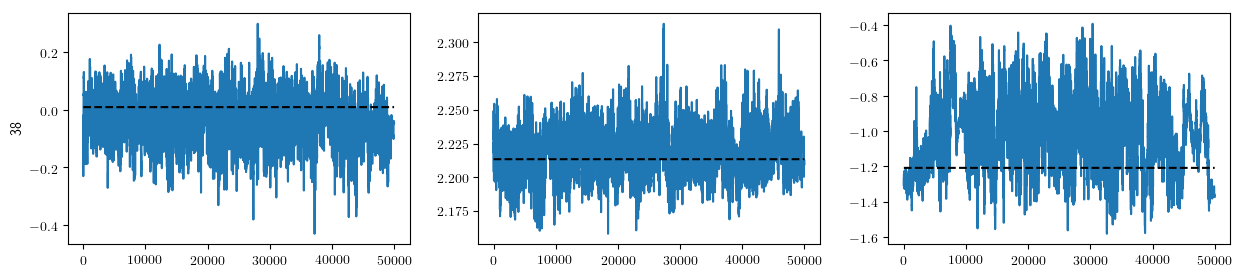

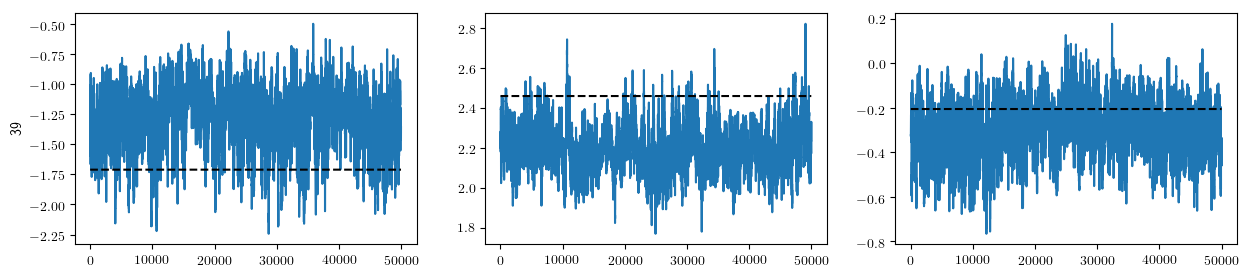

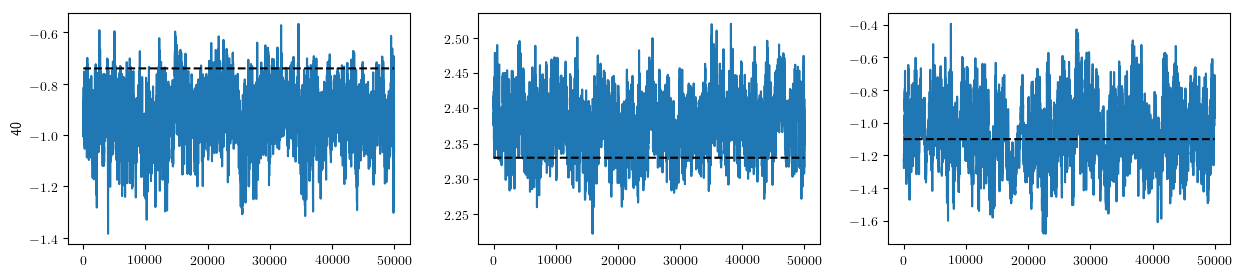

In [33]:
for i in 1:M_subjects
    
    PyPlot.figure(figsize=(15,3))
    
    ax1 = PyPlot.subplot(1,3,1)

    PyPlot.plot(chain_ϕ_long_10[i,1,burn_in_trace:end])
    PyPlot.plot(ϕ[i,1]*ones(R-burn_in_trace), "k--");
    PyPlot.ylabel(i)

    ax1 = PyPlot.subplot(1,3,2)
    PyPlot.plot(chain_ϕ_long_10[i,2,burn_in_trace:end])
    PyPlot.plot(ϕ[i,2]*ones(R-burn_in_trace), "k--");

    ax1 = PyPlot.subplot(1,3,3)
    PyPlot.plot(chain_ϕ_long_10[i,3,burn_in_trace:end])
    PyPlot.plot(ϕ[i,3]*ones(R-burn_in_trace), "k--");
end 

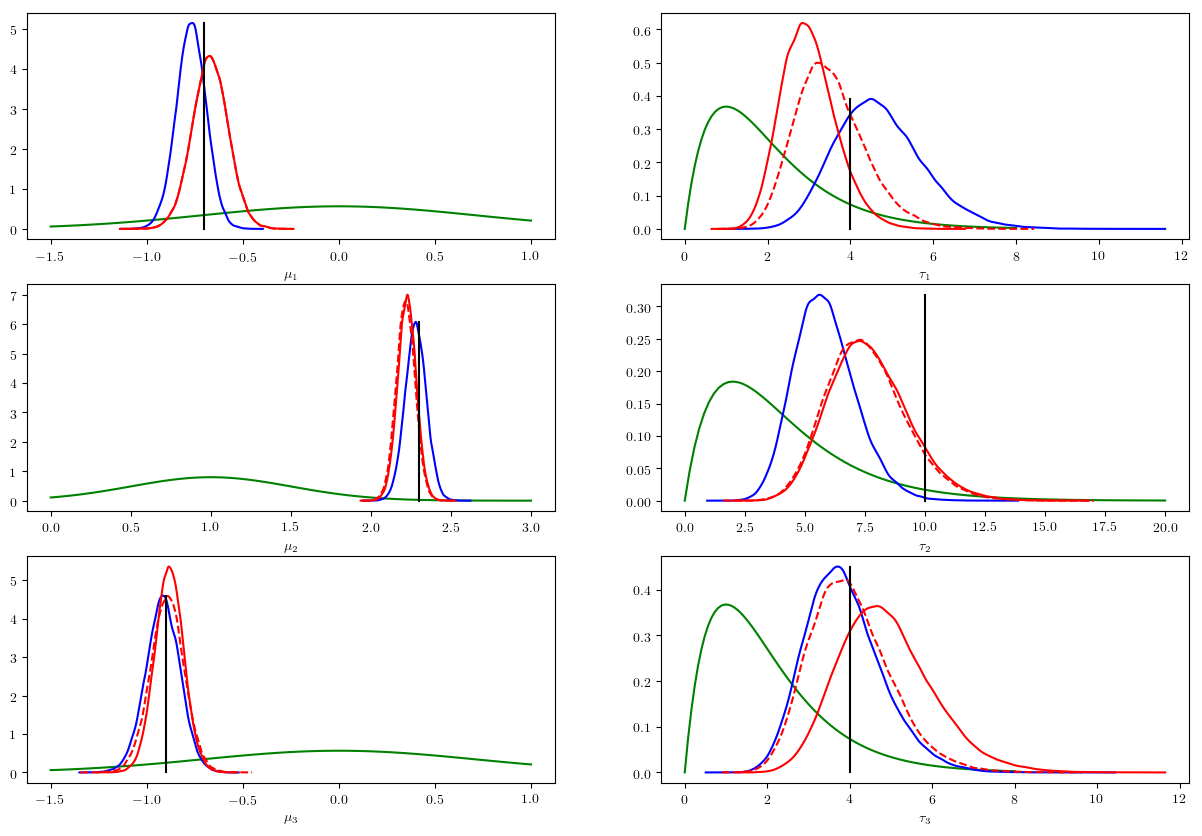

In [42]:
prior_grid_tau = LinRange(0,8,100)
prior_grid_tau2 = LinRange(0,20,100)

prior_tau1 = pdf.(Gamma(prior_parameters_η[1,3],1/prior_parameters_η[1,4]),prior_grid_tau)
prior_tau2 = pdf.(Gamma(prior_parameters_η[2,3],1/prior_parameters_η[2,4]),prior_grid_tau2)
prior_tau3 = pdf.(Gamma(prior_parameters_η[3,3],1/prior_parameters_η[3,4]),prior_grid_tau)

prior_grid_mu13 = prior_grid = LinRange(-1.5,1,100)
prior_grid_mu2 = prior_grid = LinRange(0,3,100)

tau1 = prior_parameters_η[1,3]/prior_parameters_η[1,4]
tau2 = prior_parameters_η[2,3]/prior_parameters_η[2,4]
tau3 = prior_parameters_η[3,3]/prior_parameters_η[3,4]

prior_mu1 = pdf.(Normal(prior_parameters_η[1,1],sqrt(1/(prior_parameters_η[1,2]*tau1))),prior_grid_mu13)
prior_mu2 = pdf.(Normal(prior_parameters_η[2,1],sqrt(1/(prior_parameters_η[2,2]*tau2))),prior_grid_mu2)
prior_mu3 = pdf.(Normal(prior_parameters_η[3,1],sqrt(1/(prior_parameters_η[3,2]*tau3))),prior_grid_mu13)

posterior_kalman1 = kde(chain_η_kalman[1,10000:end])
posterior_cpmmh_5_1 = kde(chain_η_long_5[1,1:end])
posterior_cpmmh_10_1 = kde(chain_η_long_10[1,1:end])
#posterior_cpmmh1099 = kde(chain_η_cpmmh099[1,burn_in:end])
#posterior_cpmmh10999 = kde(chain_η_cpmmh0999[1,burn_in:end])

posterior_kalman2 = kde(chain_η_kalman[2,10000:end])
posterior_cpmmh_5_2 = kde(chain_η_long_5[2,1:end])
posterior_cpmmh_10_2 = kde(chain_η_long_10[2,1:end])
#posterior_cpmmh2099 = kde(chain_η_cpmmh099[2,burn_in:end])
#posterior_cpmmh20999 = kde(chain_η_cpmmh0999[2,burn_in:end])

posterior_kalman3 = kde(chain_η_kalman[3,10000:end])
posterior_cpmmh_5_3 = kde(chain_η_long_5[3,1:end])
posterior_cpmmh_10_3 = kde(chain_η_long_10[3,1:end])
#posterior_cpmmh3099 = kde(chain_η_cpmmh099[3,burn_in:end])
#posterior_cpmmh30999 = kde(chain_η_cpmmh0999[3,burn_in:end])

posterior_kalman4 = kde(chain_η_kalman[4,10000:end])
posterior_cpmmh_5_4 = kde(chain_η_long_5[4,1:end])
posterior_cpmmh_10_4 = kde(chain_η_long_10[4,1:end])
#posterior_cpmmh4099 = kde(chain_η_cpmmh099[4,burn_in:end])
#posterior_cpmmh40999 = kde(chain_η_cpmmh0999[4,burn_in:end])

posterior_kalman5 = kde(chain_η_kalman[5,10000:end])
posterior_cpmmh_5_5 = kde(chain_η_long_5[5,1:end])
posterior_cpmmh_10_5 = kde(chain_η_long_10[5,1:end])
#posterior_cpmmh5099 = kde(chain_η_cpmmh099[5,burn_in:end])
#posterior_cpmmh50999 = kde(chain_η_cpmmh0999[5,burn_in:end])

posterior_kalman6 = kde(chain_η_kalman[6,10000:end])
posterior_cpmmh_5_6 = kde(chain_η_long_5[6,1:end])
posterior_cpmmh_10_6 = kde(chain_η_long_10[6,1:end])
#posterior_cpmmh6099 = kde(chain_η_cpmmh099[6,burn_in:end])
#posterior_cpmmh60999 = kde(chain_η_cpmmh0999[6,burn_in:end])


PyPlot.figure(figsize=(15,10))

ax1 = PyPlot.subplot(3,2,1)
PyPlot.plot(prior_grid_mu13,prior_mu1, "g")
PyPlot.plot(posterior_kalman1.x,posterior_kalman1.density, "b")        
PyPlot.plot(posterior_cpmmh_5_1.x,posterior_cpmmh_5_1.density, "r")
PyPlot.plot(posterior_cpmmh_5_1.x,posterior_cpmmh_5_1.density, "--r")
#PyPlot.plot(posterior_cpmmh1099.x,posterior_cpmmh1099.density, "c")
#PyPlot.plot(posterior_cpmmh10999.x,posterior_cpmmh10999.density, "--c")
PyPlot.plot((η[1], η[1]), (0, maximum(posterior_kalman1.density)), "k")

PyPlot.xlabel(L"\mu_1")



ax1 = PyPlot.subplot(3,2,3)
PyPlot.plot(prior_grid_mu2,prior_mu2, "g")
PyPlot.plot(posterior_kalman2.x,posterior_kalman2.density, "b")        
PyPlot.plot(posterior_cpmmh_5_2.x,posterior_cpmmh_5_2.density, "r")
PyPlot.plot(posterior_cpmmh_10_2.x,posterior_cpmmh_10_2.density, "--r")
##PyPlot.plot(posterior_cpmmh2099.x,posterior_cpmmh2099.density, "c")
#PyPlot.plot(posterior_cpmmh20999.x,posterior_cpmmh20999.density, "--c")
PyPlot.plot((η[2], η[2]), (0, maximum(posterior_kalman2.density)), "k")

PyPlot.xlabel(L"\mu_2")



ax1 = PyPlot.subplot(3,2,5)
PyPlot.plot(prior_grid_mu13,prior_mu3, "g")
PyPlot.plot(posterior_kalman3.x,posterior_kalman3.density, "b")        
PyPlot.plot(posterior_cpmmh_5_3.x,posterior_cpmmh_5_3.density, "r")
PyPlot.plot(posterior_cpmmh_10_3.x,posterior_cpmmh_10_3.density, "--r")
#PyPlot.plot(posterior_cpmmh3099.x,posterior_cpmmh3099.density, "c")
#PyPlot.plot(posterior_cpmmh30999.x,posterior_cpmmh30999.density, "--c")
PyPlot.plot((η[3], η[3]), (0, maximum(posterior_kalman3.density)), "k")

PyPlot.xlabel(L"\mu_3")


ax1 = PyPlot.subplot(3,2,2)
PyPlot.plot(prior_grid_tau,prior_tau1, "g")
PyPlot.plot(posterior_kalman4.x,posterior_kalman4.density, "b")        
PyPlot.plot(posterior_cpmmh_5_4.x,posterior_cpmmh_5_4.density, "r")
PyPlot.plot(posterior_cpmmh_10_4.x,posterior_cpmmh_10_4.density, "--r")
#PyPlot.plot(posterior_cpmmh4099.x,posterior_cpmmh4099.density, "c")
#PyPlot.plot(posterior_cpmmh40999.x,posterior_cpmmh40999.density, "--c")
PyPlot.plot((η[4], η[4]), (0, maximum(posterior_kalman4.density)), "k")

PyPlot.xlabel(L"\tau_1")


ax1 = PyPlot.subplot(3,2,4)
PyPlot.plot(prior_grid_tau2,prior_tau2, "g")
PyPlot.plot(posterior_kalman5.x,posterior_kalman5.density, "b")        
PyPlot.plot(posterior_cpmmh_5_5.x,posterior_cpmmh_5_5.density, "r")
PyPlot.plot(posterior_cpmmh_10_5.x,posterior_cpmmh_10_5.density, "--r")
#PyPlot.plot(posterior_cpmmh5099.x,posterior_cpmmh5099.density, "c")
#PyPlot.plot(posterior_cpmmh50999.x,posterior_cpmmh50999.density, "--c")
PyPlot.plot((η[5], η[5]), (0, maximum(posterior_kalman5.density)), "k")

PyPlot.xlabel(L"\tau_2")
    

ax1 = PyPlot.subplot(3,2,6)
PyPlot.plot(prior_grid_tau,prior_tau3, "g")
PyPlot.plot(posterior_kalman6.x,posterior_kalman6.density, "b")        
PyPlot.plot(posterior_cpmmh_5_6.x,posterior_cpmmh_5_6.density, "r")
PyPlot.plot(posterior_cpmmh_10_6.x,posterior_cpmmh_10_6.density, "--r")
#PyPlot.plot(posterior_cpmmh6099.x,posterior_cpmmh6099.density, "c")
#PyPlot.plot(posterior_cpmmh60999.x,posterior_cpmmh60999.density, "--c")
PyPlot.plot((η[6], η[6]), (0, maximum(posterior_kalman6.density)), "k")
PyPlot.xlabel(L"\tau_3");


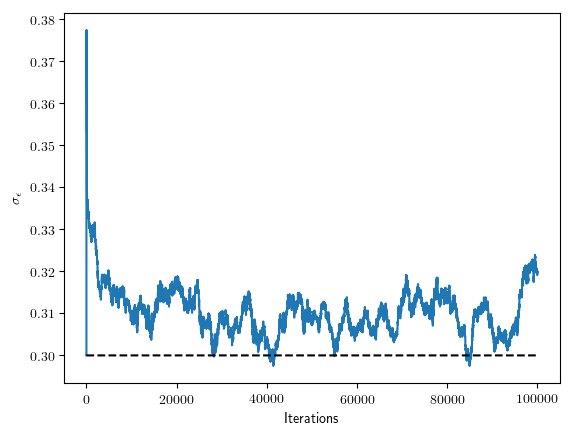

In [18]:
PyPlot.figure()
PyPlot.plot(chain_σ_ϵ_long_5[1,burn_in_trace:end])
PyPlot.plot(σ_ϵ*ones(R_long-burn_in_trace), "k--")
PyPlot.ylabel(L"\sigma_{\epsilon}")
PyPlot.xlabel("Iterations");

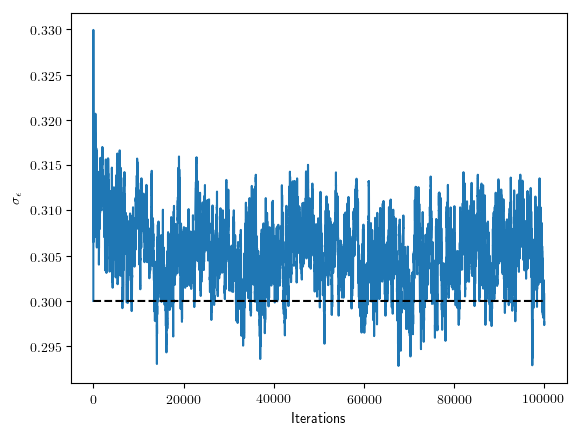

In [19]:
PyPlot.figure()
PyPlot.plot(chain_σ_ϵ_long_10[burn_in_trace:end])
PyPlot.plot(σ_ϵ*ones(R_long-burn_in_trace), "k--")
PyPlot.ylabel(L"\sigma_{\epsilon}")
PyPlot.xlabel("Iterations");